# <a id='toc1_'></a>[The Regresson Project](#toc0_)

## <a id='toc1_1_'></a>[Business Understanding](#toc0_)

## <a id='toc1_2_'></a>[Background](#toc0_)

#### <a id='toc1_2_1_1_'></a>[This project centres on time series forecasting to predict store sales for Corporacion Favorita, a major Ecuadorian-based grocery retailer. The aim is to develop a model that accurately forecasts the unit sales of thousands of items across various Favorita stores.](#toc0_)

## <a id='toc1_3_'></a>[Scenario](#toc0_)

#### <a id='toc1_3_1_1_'></a>[As the team lead for data science at Corporation Favorita, a large Ecuadorian-based grocery retailer, my goal is to ensure that we always have the right quantity of products in stock. To achieve this, we have decided to build a series of machine learning models to forecast the demand for products in various locations. The marketing and sales team have provided us with some data to aid in this endeavour. Our team uses the CRISP-DM Framework for our Data Science projects.](#toc0_)

## <a id='toc1_4_'></a>[Objective](#toc0_)

### <a id='toc1_4_1_'></a>[This project will focus on two key areas.](#toc0_)

#### <a id='toc1_4_1_1_'></a>[*Understanding the Data:* The first objective is to gain insights into the store sales data, including store-specific information, product families, promotions, and sales numbers. This understanding will enable the company to make informed business decisions.](#toc0_)

#### <a id='toc1_4_1_2_'></a>[*Predicting Store Sales:* The goal is to develop a reliable time series forecasting model that accurately predicts the unit sales for different product families at various Favorita stores. This will help the company optimize inventory management, plan promotions, and improve overall sales performance.](#toc0_)

## <a id='toc1_5_'></a>[Methodology](#toc0_)

#### <a id='toc1_5_1_1_'></a>[*Data Exploration:* Our team will begin with a thorough exploration of the data. This involves examining the dataset to understand its structure, identifying missing values, and assessing the overall quality of the data. We will perform descriptive statistics to summarise the main features of the data and use visualisation techniques to uncover patterns and trends. By understanding the relationships between different variables, such as store-specific information, product families, promotions, and sales numbers, we will be able to identify key factors that influence sales.](#toc0_)

#### <a id='toc1_5_1_2_'></a>[*Data Preparation:* Once we have a good grasp of the data, we will move on to the data preparation phase. This step includes cleaning the data by handling missing values, outliers, and any inconsistencies. We will also perform feature engineering to create new variables that can enhance the model's predictive power. For instance, we might create features that capture seasonality, promotional effects, and store-specific trends. The data will be split into training and testing sets to validate our models effectively.](#toc0_)

#### <a id='toc1_5_1_3_'></a>[*Time Series Analysis:* With the prepared data, we will conduct a time series analysis to model and forecast sales. We will evaluate each model's performance using appropriate metrics and cross-validation techniques to ensure robustness. The chosen model will be fine-tuned to optimise its accuracy in predicting unit sales for various product families across different Favorita stores. This forecasting model will then be used to help the company optimise inventory management, plan promotions, and improve overall sales performance.](#toc0_)

## <a id='toc1_6_'></a>[Additional Notes](#toc0_)

#### <a id='toc1_6_1_1_'></a>[**1.** Wages in the public sector are paid every two weeks on the 15th and on the last day of the month. Supermarket sales could be affected by this.](#toc0_)

#### <a id='toc1_6_1_2_'></a>[**2.** A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.](#toc0_)

## <a id='toc1_7_'></a>[Hypothesis](#toc0_)

 **`Null Hypothesis`**

#### <a id='toc1_7_1_1_'></a>[There is no significant relationship between the date and the sales figures in the dataset.](#toc0_)

**` Alternative Hypothesis `**

#### <a id='toc1_7_1_2_'></a>[There is a significant relationship between the date and the sales figures in the dataset.](#toc0_)

## <a id='toc1_8_'></a>[Analytical Questions](#toc0_)

#### <a id='toc1_8_1_1_'></a>[**1.** `Is the train dataset complete (has all the required dates)?`](#toc0_)

#### <a id='toc1_8_1_2_'></a>[**2.** `Which dates have the lowest and highest sales for each year (excluding days the store was closed)?`](#toc0_)

#### <a id='toc1_8_1_3_'></a>[**3.** `Compare the sales for each month across the years and determine which month of which year had the highest sales.`](#toc0_)


#### <a id='toc1_8_1_4_'></a>[**4.** `Did the earthquake impact sales?`](#toc0_)

#### <a id='toc1_8_1_5_'></a>[**5.** `Are certain stores or groups of stores selling more products? (Cluster, city, state, type)`](#toc0_)

#### <a id='toc1_8_1_6_'></a>[**6.** `Are sales affected by promotions, oil prices and holidays?`](#toc0_)

#### <a id='toc1_8_1_7_'></a>[**7.** `What analysis can we get from the date and its extractable features?`](#toc0_)


#### <a id='toc1_8_1_8_'></a>[**8.** `Which product family and stores did the promotions affect.`](#toc0_)


#### <a id='toc1_8_1_9_'></a>[**9.** `What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)`](#toc0_)


#### <a id='toc1_8_1_10_'></a>[**10.** `Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.`](#toc0_)

## <a id='toc1_9_'></a>[Data Understandng](#toc0_)

### <a id='toc1_9_1_'></a>[Data Collection](#toc0_)

#### <a id='toc1_9_1_1_'></a>[The task involves accessing three distinct datasets from different sources: a database, OneDrive, and a GitHub repository. Each dataset requires a specific access method. For the database, we will query using an ODBC or ORM library. For OneDrive, we will download the file programmatically using the requests library. For the GitHub repository, we will either clone or download the file using GitPython or the requests library.](#toc0_)

### <a id='toc1_9_2_'></a>[`Importation`](#toc0_)

In [1]:

# Importing necessary libraries
from dotenv import dotenv_values
import pyodbc
import requests
import pandas as pd
import os
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
import calendar
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import linregress
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.svm import SVC
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense
import sequential
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import random
import itertools
import joblib
import pmdarima as pm
import warnings
# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)


Importing plotly failed. Interactive plots will not work.


### <a id='toc1_9_3_'></a>[` Data Loading `](#toc0_)


In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("user")
password = environment_variables.get("password")

In [3]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the pyodbc library to pass in the connection string.

connection = pyodbc.connect(connection_string)

In [5]:
# Accessing the data from the database
query = "SELECT * FROM dbo.oil"

In [6]:
# Viewing the table in the database 
train_1 = pd.read_sql(query, connection)
train_1

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997
...,...,...
1213,2017-08-25,47.650002
1214,2017-08-28,46.400002
1215,2017-08-29,46.459999
1216,2017-08-30,45.959999


In [7]:
# Accessing the data from the database 
query ="SELECT * FROM dbo.holidays_events"

In [8]:
# Viewing the table in the database 
train_2 = pd.read_sql(query, connection)
train_2

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [9]:
# Accessing the data from the database 
query ="SELECT * FROM dbo.stores"

In [10]:
# Viewing the table in the database 
train_3 = pd.read_sql(query, connection)
train_3

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [11]:
# Close the database connection
connection.close()

In [12]:
# Read the remaining dataset in the csv file
train_4 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\The_Regression_Project\Project_data\train.csv")
train_4

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [13]:
# Read the remaining dataset in the csv file
train_5 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\The_Regression_Project\Project_data\transactions.csv")
train_5

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [14]:
# Read the remaining dataset in the csv file
train_6 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\The_Regression_Project\Project_data\test.csv")
train_6

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [15]:
# Read the remaining dataset in the csv file
train_7 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\The_Regression_Project\Project_data\test.csv")
train_7 

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


## <a id='toc1_10_'></a>[Exploratory Data Analysis: EDA](#toc0_)

In [16]:
# Check the datatypes and number of columns
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [17]:
# Check the datatypes and number of columns

train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [18]:
# Check the datatypes and number of columns

train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [19]:
#  check the datatypes and number of columns

train_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [20]:
# Check the datatypes and number of columns

train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [21]:
# check the datatypes and number of columns

train_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [22]:
# Check the datatypes and number of columns 

train_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [23]:
#  Change the datatype of the "date" column
def convert_date_and_info(df, date_column= 'date'):
    """
    Convert a specified column of a DataFrame to datetime and print DataFrame info.
    """
    df[date_column] = pd.to_datetime(df[date_column])
    return df
convert_date_and_info(train_1)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997
...,...,...
1213,2017-08-25,47.650002
1214,2017-08-28,46.400002
1215,2017-08-29,46.459999
1216,2017-08-30,45.959999


In [24]:
# Change the datatypes of the "date" column

convert_date_and_info(train_2, 'date')

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [25]:
#  Change the datatype for the "date" column 

convert_date_and_info(train_4, 'date')

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [26]:
# Change the datatype of the "date" column
convert_date_and_info(train_5, 'date')


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [27]:
# change the datatype of the "date" column
convert_date_and_info(train_6, 'date')

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [28]:
# Change the datatype of the "date" column

convert_date_and_info(train_7, 'date')

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [29]:
def add_date_parts(df, date_column='date'):
    """
    Add day names, month, week, and year as separate columns in a DataFrame.
    """
    df['day'] = df[date_column].dt.day_name()
    df['month'] = df[date_column].dt.month
    df['week'] = df[date_column].dt.isocalendar().week.astype(int)
    df['year'] = df[date_column].dt.year
    return df

# Create a copy of the original Dataframe to preserve the orginal data

train_4_copy = train_4.copy()
train_4_copy = add_date_parts(train_4_copy, 'date')

In [30]:
def analyze_dataframes(dataframes):
    """
    Analyze the missing values and duplicated rows for each DataFrame in the given dictionary.
    """
    for name, df in dataframes.items():
        # Determine the proportion of missing values
        missing_percentage = (df.isnull().mean() * 100).round(2)

        # Check for duplicated values
        duplicate_num = df.duplicated(subset=None, keep=False).sum()

        # Display duplicated rows if any
        duplicated_rows = df[df.duplicated(subset=None, keep=False)]

        # Display results
        print(f"Proportion of missing values in {name} dataset:")
        print(missing_percentage)
        print(f"\nNumber of duplicated rows in {name} dataset: {duplicate_num}")
        if duplicate_num > 0:
            print(f"\nDuplicated rows in the {name} dataset:")
            print(duplicated_rows)
        print("\n" + "-" * 50 + "\n")
    return dataframes
# Create a dictionary of the DataFrames to process
dataframes = {
    "train_1": train_1,
    "train_2": train_2,
    "train_3": train_3,
    "train_5": train_5,
    "train_6": train_6,
    "train_7": train_7,
    "train_4_copy": train_4_copy,
}

# Call the function to analyze the DataFrames
analyze_dataframes(dataframes)

Proportion of missing values in train_1 dataset:
date          0.00
dcoilwtico    3.53
dtype: float64

Number of duplicated rows in train_1 dataset: 0

--------------------------------------------------

Proportion of missing values in train_2 dataset:
date           0.0
type           0.0
locale         0.0
locale_name    0.0
description    0.0
transferred    0.0
dtype: float64

Number of duplicated rows in train_2 dataset: 0

--------------------------------------------------

Proportion of missing values in train_3 dataset:
store_nbr    0.0
city         0.0
state        0.0
type         0.0
cluster      0.0
dtype: float64

Number of duplicated rows in train_3 dataset: 0

--------------------------------------------------

Proportion of missing values in train_5 dataset:
date            0.0
store_nbr       0.0
transactions    0.0
dtype: float64

Number of duplicated rows in train_5 dataset: 0

--------------------------------------------------

Proportion of missing values in train_6

{'train_1':            date  dcoilwtico
 0    2013-01-01         NaN
 1    2013-01-02   93.139999
 2    2013-01-03   92.970001
 3    2013-01-04   93.120003
 4    2013-01-07   93.199997
 ...         ...         ...
 1213 2017-08-25   47.650002
 1214 2017-08-28   46.400002
 1215 2017-08-29   46.459999
 1216 2017-08-30   45.959999
 1217 2017-08-31   47.259998
 
 [1218 rows x 2 columns],
 'train_2':           date        type    locale locale_name  \
 0   2012-03-02     Holiday     Local       Manta   
 1   2012-04-01     Holiday  Regional    Cotopaxi   
 2   2012-04-12     Holiday     Local      Cuenca   
 3   2012-04-14     Holiday     Local    Libertad   
 4   2012-04-21     Holiday     Local    Riobamba   
 ..         ...         ...       ...         ...   
 345 2017-12-22  Additional  National     Ecuador   
 346 2017-12-23  Additional  National     Ecuador   
 347 2017-12-24  Additional  National     Ecuador   
 348 2017-12-25     Holiday  National     Ecuador   
 349 2017-12-26  Ad

In [31]:
# View columns in train_4_copy

train_4_copy.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'day',
       'month', 'week', 'year'],
      dtype='object')

In [32]:
# Display unique values of train_4_copy

train_4_copy.nunique()

# List the unique values in each column

for column in train_4_copy.columns:
    print(f'{column}: {train_4_copy[column].unique()}')


id: [      0       1       2 ... 3000885 3000886 3000887]
date: <DatetimeArray>
['2013-01-01 00:00:00', '2013-01-02 00:00:00', '2013-01-03 00:00:00',
 '2013-01-04 00:00:00', '2013-01-05 00:00:00', '2013-01-06 00:00:00',
 '2013-01-07 00:00:00', '2013-01-08 00:00:00', '2013-01-09 00:00:00',
 '2013-01-10 00:00:00',
 ...
 '2017-08-06 00:00:00', '2017-08-07 00:00:00', '2017-08-08 00:00:00',
 '2017-08-09 00:00:00', '2017-08-10 00:00:00', '2017-08-11 00:00:00',
 '2017-08-12 00:00:00', '2017-08-13 00:00:00', '2017-08-14 00:00:00',
 '2017-08-15 00:00:00']
Length: 1684, dtype: datetime64[ns]
store_nbr: [ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]
family: ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIA

In [33]:
# Describe the numeric columns of the train_4_copy

train_4_copy.describe().T

,count,mean,min,25%,50%,75%,max,std
id,3000888.0,1500443.5,0.0,750221.75,1500443.5,2250665.25,3000887.0,866281.891642
date,3000888,2015-04-24 08:27:04.703088384,2013-01-01 00:00:00,2014-02-26 18:00:00,2015-04-24 12:00:00,2016-06-19 06:00:00,2017-08-15 00:00:00,NaN
store_nbr,3000888.0,27.5,1.0,14.0,27.5,41.0,54.0,15.585787
sales,3000888.0,357.775749,0.0,0.0,11.0,195.84725,124717.0,1101.997721
onpromotion,3000888.0,2.60277,0.0,0.0,0.0,0.0,741.0,12.218882
month,3000888.0,6.207838,1.0,3.0,6.0,9.0,12.0,3.385668
week,3000888.0,25.242874,1.0,13.0,25.0,38.0,53.0,14.794671
year,3000888.0,2014.837886,2013.0,2014.0,2015.0,2016.0,2017.0,1.345518


In [34]:
# Describe the train_4_copy data including objects

train_4_copy.describe(include='object').T

,count,unique,top,freq
family,3000888,33,AUTOMOTIVE,90936
day,3000888,7,Tuesday,431244


### <a id='toc1_10_1_'></a>[Visualizing Holidays and Events](#toc0_)

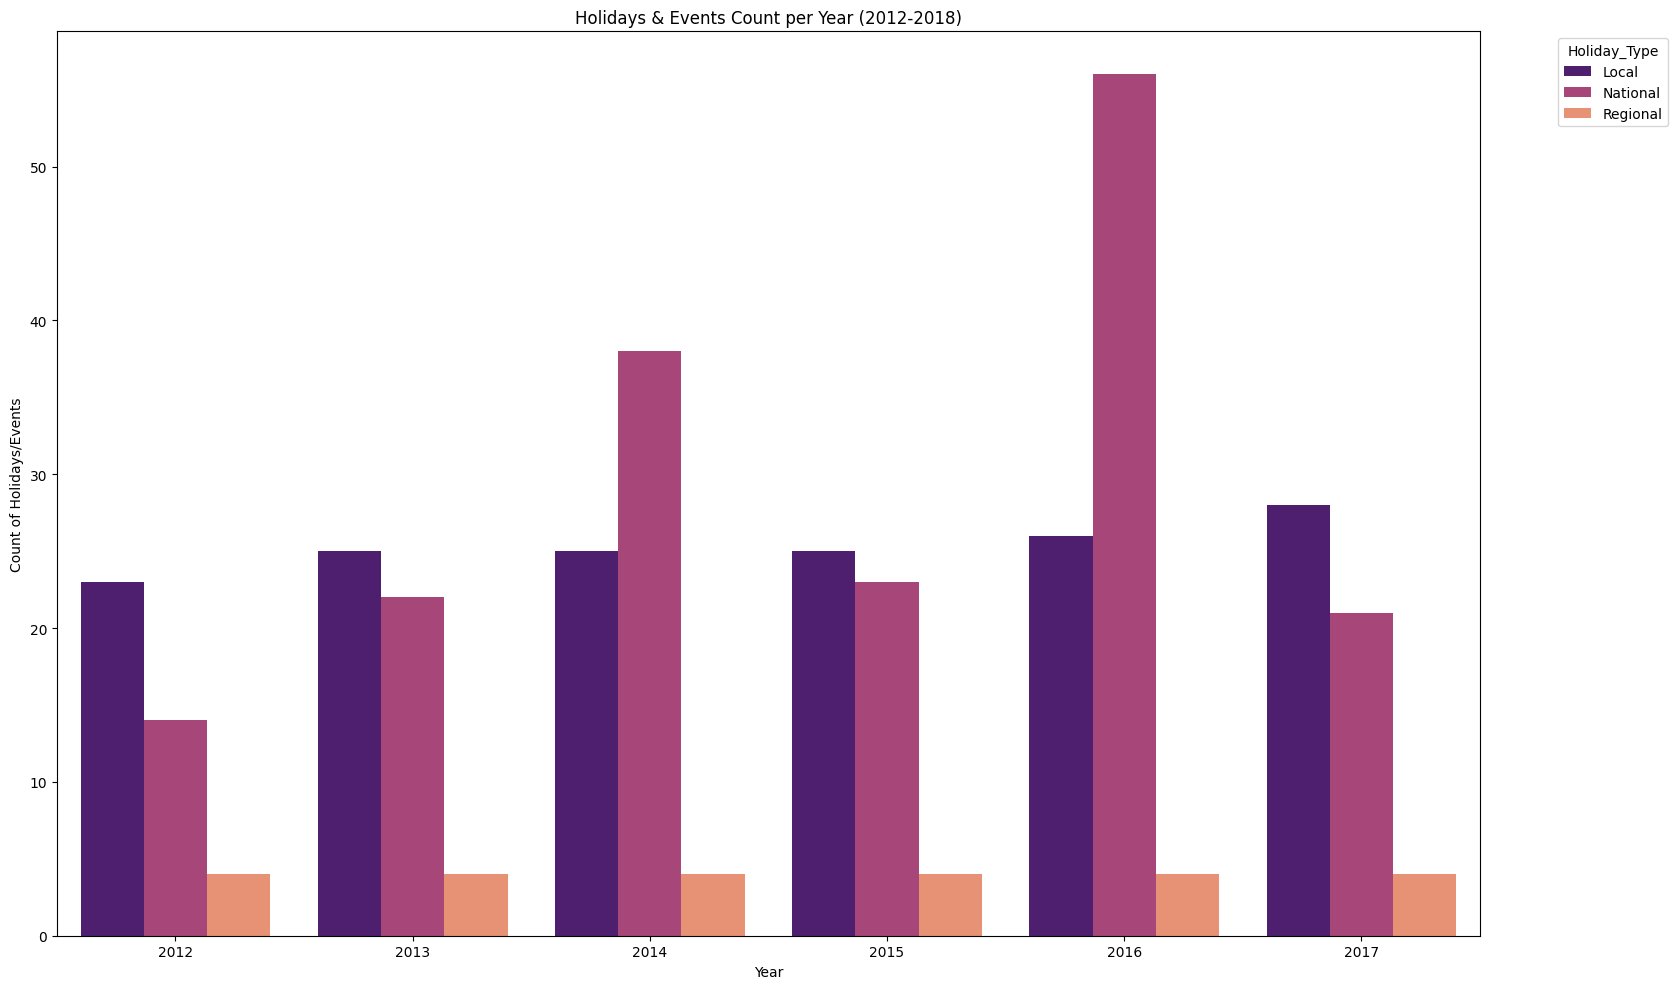

In [35]:
# Convert 'date' to datetime format if not already done
train_2['date'] = pd.to_datetime(train_2['date'])

# Extract the year from the date
train_2['year'] = train_2['date'].dt.year

# Count the number of holidays/events per year per locale
train_2_count = train_2.groupby(['year', 'locale']).size().reset_index(name='counts')

plt.figure(figsize=(15, 10))
sns.barplot(data=train_2_count, x='year', y='counts', hue='locale', palette='magma')
plt.title('Holidays & Events Count per Year (2012-2018)')
plt.xlabel('Year')
plt.ylabel('Count of Holidays/Events')
plt.grid(False)
plt.tight_layout()
plt.legend(title='Holiday_Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### <a id='toc1_10_1_1_'></a>[Yearly Trends:](#toc0_)

The plot shows how the number of holidays and events has changed over the years from 2012 to 2017. By examining the heights of the bars, we can identify which years had more or fewer holidays/events.
** **
Holiday_Type Differences:

The different colors in the bars represent different locales. This allows us to see how the distribution of holidays/events varies across different regions or locations.
** **
Business Implications:

Understanding the distribution of holidays and events can help in planning marketing campaigns, inventory management, and staffing. For instance, if certain years or Holiday_Types have consistently high numbers, businesses can prepare for increased demand during those periods.
This visualisation provides valuable insights into the distribution of holidays and events, which can inform strategic decision-making for business operations and marketing efforts.



### <a id='toc1_10_2_'></a>[Insights pertaining to stores](#toc0_)

In [36]:
# The number of unique stores in train_3

train_3['store_nbr'].nunique()

54

In [37]:
# The number of cities the stores are located 

train_3['city'].nunique()

22

In [38]:
# The number of unique states the stores are located

train_3['state'].nunique()

16

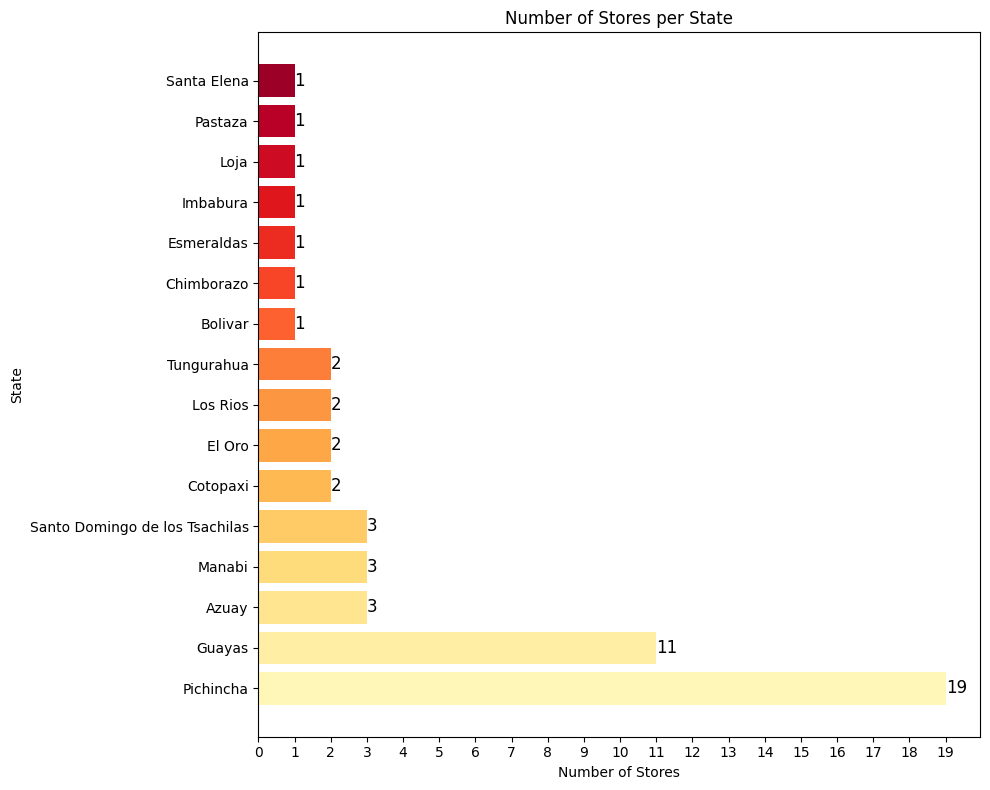

,state,store_nbr
0,Pichincha,19
1,Guayas,11
2,Azuay,3
3,Manabi,3
4,Santo Domingo de los Tsachilas,3
5,Cotopaxi,2
6,El Oro,2
7,Los Rios,2
8,Tungurahua,2
9,Bolivar,1


In [39]:
# Count the unique number of stores in each state
store_count = train_3.groupby('state').store_nbr.nunique().sort_values(ascending=False).reset_index()

# Plotting a horizontal bar chart to visualize the number of stores per state
plt.figure(figsize=(10, 8))
bars = plt.barh(store_count['state'], store_count['store_nbr'], color=sns.color_palette('YlOrRd', n_colors=len(store_count)))

# Adding data labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=12, color='black')

max_stores = store_count['store_nbr'].max()
plt.xticks(list(range(0, max_stores + 1)))
plt.title('Number of Stores per State')
plt.xlabel('Number of Stores')
plt.ylabel('State')
plt.grid(False)  # Turn off grid
plt.tight_layout()
plt.show()

# Display store count per state
store_count


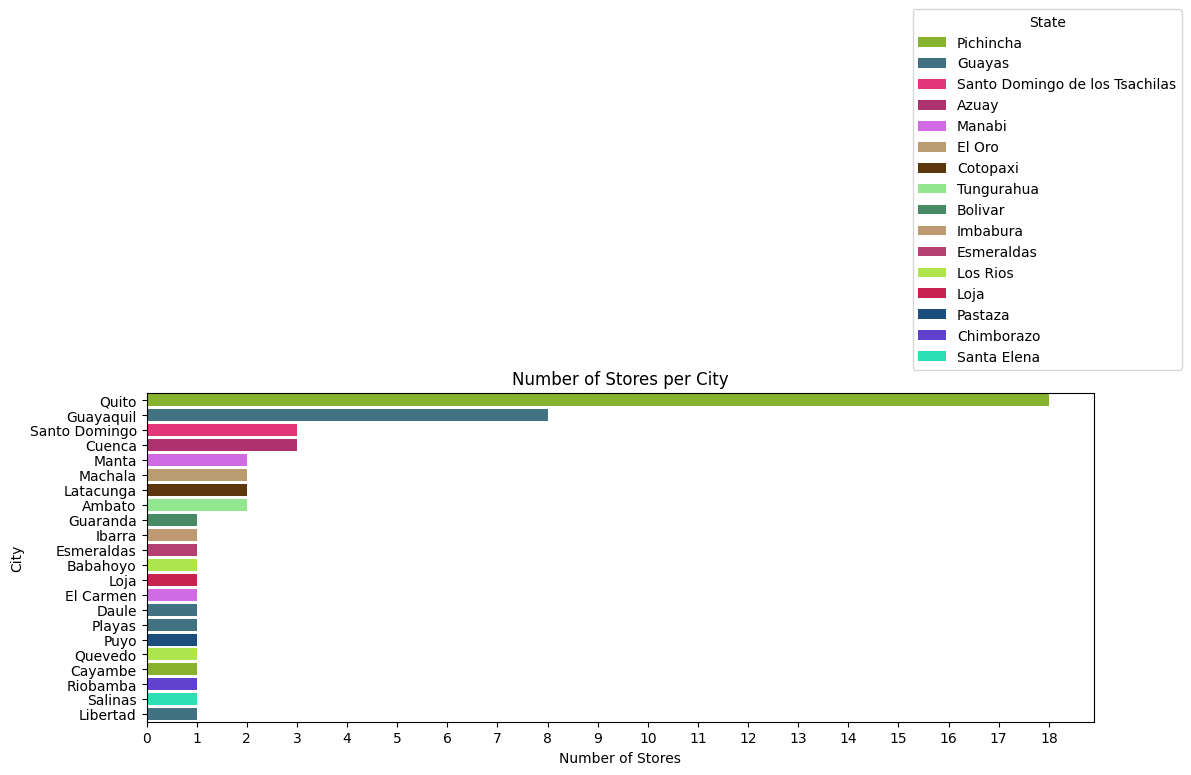

,city,state,store_nbr
0,Quito,Pichincha,18
1,Guayaquil,Guayas,8
2,Santo Domingo,Santo Domingo de los Tsachilas,3
3,Cuenca,Azuay,3
4,Manta,Manabi,2
5,Machala,El Oro,2
6,Latacunga,Cotopaxi,2
7,Ambato,Tungurahua,2
8,Guaranda,Bolivar,1
9,Ibarra,Imbabura,1


In [40]:
# Count the unique number of stores in each city with state as hue
store_count = train_3.groupby(['city', 'state']).store_nbr.nunique().sort_values(ascending=False).reset_index()

# Generate random colors for each unique state
unique_states = store_count['state'].unique()
random_colors = {state: f'#{random.randint(0, 0xFFFFFF):06x}' for state in unique_states}

# Plotting the unique number of stores for each city with hue as 'state'
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=store_count, y='city', x='store_nbr', hue='state', palette=random_colors, dodge=False, orient='h')

# Adding data labels to each bar
for p in ax.patches:
    if p.get_width() > 0:
        ax.annotate(format(p.get_width(), '.0f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', 
                    xytext=(10, 0), 
                    textcoords='offset points',
                    color='white')

# Setting whole number units for x-axis ticks
max_stores = store_count['store_nbr'].max()
plt.xticks(list(range(0, max_stores + 1)))

plt.title('Number of Stores per City')
plt.xlabel('Number of Stores')
plt.ylabel('City')

# Move legend to the top right corner
plt.legend(title='State', bbox_to_anchor=(1.1, 1.05), loc='lower right')

plt.grid(False)  # Turn off grid lines
plt.tight_layout()
plt.show()

# Display store count per city
store_count


In [45]:
# Merge the train data (train_4_copy) with the stores data (train_3) based on 'store_nbr' column
merge_1 = pd.merge(train_1, train_2 , on=['date'], how='inner')

# Check for duplicate dates in merged_df2
count_duplicate = merge_1.duplicated(subset='date', keep=False).sum()

# Display the duplicate dates
print(f"Number of duplicated dates is: {count_duplicate}\n")

# Display a info of the dataframe
merge_1.info()


# Do a dot head to varify the merge
merge_1.head()

Number of duplicated dates is: 32

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         202 non-null    datetime64[ns]
 1   dcoilwtico   182 non-null    float64       
 2   type         202 non-null    object        
 3   locale       202 non-null    object        
 4   locale_name  202 non-null    object        
 5   description  202 non-null    object        
 6   transferred  202 non-null    bool          
 7   year         202 non-null    int32         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), object(4)
memory usage: 10.6+ KB


,date,dcoilwtico,type,locale,locale_name,description,transferred,year
0,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013
1,2013-02-11,97.010002,Holiday,National,Ecuador,Carnaval,False,2013
2,2013-02-12,97.480003,Holiday,National,Ecuador,Carnaval,False,2013
3,2013-04-01,97.099998,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2013
4,2013-04-12,91.230003,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2013


In [46]:
# Merge merge_1 with transactions data (train_5) based on 'date' and 'store_nbr' columns
merge_2 = pd.merge(merge_1, train_4_copy, on=['date'], how='inner')

# Check for duplicate dates in merged_df2
count_duplicate = merge_2.duplicated(subset='date', keep=False).sum()

# Display the duplicate dates
print(f"Number of duplicated dates is: {count_duplicate}\n")

# Display a info of the dataframe
merge_2.info()

# Display the first 5 rows of the merged dataframe to verify the merge operation
merge_2.head()

Number of duplicated dates is: 352836

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352836 entries, 0 to 352835
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         352836 non-null  datetime64[ns]
 1   dcoilwtico   322542 non-null  float64       
 2   type         352836 non-null  object        
 3   locale       352836 non-null  object        
 4   locale_name  352836 non-null  object        
 5   description  352836 non-null  object        
 6   transferred  352836 non-null  bool          
 7   year_x       352836 non-null  int32         
 8   id           352836 non-null  int64         
 9   store_nbr    352836 non-null  int64         
 10  family       352836 non-null  object        
 11  sales        352836 non-null  float64       
 12  onpromotion  352836 non-null  int64         
 13  day          352836 non-null  object        
 14  month        352836 non-null  int32         


,date,dcoilwtico,type,locale,locale_name,description,transferred,year_x,id,store_nbr,family,sales,onpromotion,day,month,week,year_y
0,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,0,1,AUTOMOTIVE,0.0,0,Tuesday,1,1,2013
1,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,BABY CARE,0.0,0,Tuesday,1,1,2013
2,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,2,1,BEAUTY,0.0,0,Tuesday,1,1,2013
3,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,3,1,BEVERAGES,0.0,0,Tuesday,1,1,2013
4,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,4,1,BOOKS,0.0,0,Tuesday,1,1,2013


In [51]:
# Merge merge_2 with oil data based on 'date' column
merge_3 = pd.merge(merge_2, train_5, on=['date','store_nbr'],  how='inner')

# Check for duplicate dates in merge_3
count_duplicate = merge_3.duplicated(subset='date', keep=False).sum()

# show duplicate dates
print(f"Number of duplicated dates is: {count_duplicate}\n")

# Display a info of the dataframe
merge_3.info()

# Display the first 5 rows of the merged dataframe to verify the merge operation
merge_3.head()


Number of duplicated dates is: 322047

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          322047 non-null  datetime64[ns]
 1   dcoilwtico    300003 non-null  float64       
 2   type          322047 non-null  object        
 3   locale        322047 non-null  object        
 4   locale_name   322047 non-null  object        
 5   description   322047 non-null  object        
 6   transferred   322047 non-null  bool          
 7   year_x        322047 non-null  int32         
 8   id            322047 non-null  int64         
 9   store_nbr     322047 non-null  int64         
 10  family        322047 non-null  object        
 11  sales         322047 non-null  float64       
 12  onpromotion   322047 non-null  int64         
 13  day           322047 non-null  object        
 14  month         322047 non-null

,date,dcoilwtico,type,locale,locale_name,description,transferred,year_x,id,store_nbr,family,sales,onpromotion,day,month,week,year_y,transactions
0,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,561,25,AUTOMOTIVE,0.0,0,Tuesday,1,1,2013,770
1,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,562,25,BABY CARE,0.0,0,Tuesday,1,1,2013,770
2,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,563,25,BEAUTY,2.0,0,Tuesday,1,1,2013,770
3,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,564,25,BEVERAGES,810.0,0,Tuesday,1,1,2013,770
4,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,565,25,BOOKS,0.0,0,Tuesday,1,1,2013,770


In [52]:
# Merge merge_2 with oil data based on 'date' column
df_train = pd.merge(merge_3, train_3, on=['store_nbr'],  how='inner')

# Check for duplicate dates in merge_3
count_duplicate = df_train.duplicated(subset='date', keep=False).sum()

# show duplicate dates
print(f"Number of duplicated dates is: {count_duplicate}\n")

# Display a info of the dataframe
df_train.info()

# Display the first 5 rows of the merged dataframe to verify the merge operation
df_train.head()

Number of duplicated dates is: 322047

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          322047 non-null  datetime64[ns]
 1   dcoilwtico    300003 non-null  float64       
 2   type_x        322047 non-null  object        
 3   locale        322047 non-null  object        
 4   locale_name   322047 non-null  object        
 5   description   322047 non-null  object        
 6   transferred   322047 non-null  bool          
 7   year_x        322047 non-null  int32         
 8   id            322047 non-null  int64         
 9   store_nbr     322047 non-null  int64         
 10  family        322047 non-null  object        
 11  sales         322047 non-null  float64       
 12  onpromotion   322047 non-null  int64         
 13  day           322047 non-null  object        
 14  month         322047 non-null

,date,dcoilwtico,type_x,locale,locale_name,description,transferred,year_x,id,store_nbr,family,sales,onpromotion,day,month,week,year_y,transactions,city,state,type_y,cluster
0,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,561,25,AUTOMOTIVE,0.0,0,Tuesday,1,1,2013,770,Salinas,Santa Elena,D,1
1,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,562,25,BABY CARE,0.0,0,Tuesday,1,1,2013,770,Salinas,Santa Elena,D,1
2,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,563,25,BEAUTY,2.0,0,Tuesday,1,1,2013,770,Salinas,Santa Elena,D,1
3,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,564,25,BEVERAGES,810.0,0,Tuesday,1,1,2013,770,Salinas,Santa Elena,D,1
4,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,2013,565,25,BOOKS,0.0,0,Tuesday,1,1,2013,770,Salinas,Santa Elena,D,1


### <a id='toc1_10_3_'></a>[**NB**](#toc0_)
** **
merge_1 contains

In [46]:
def duplicate_percent(df, name="DataFrame"):
    """
    Analyze the missing values and duplicated rows in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    name (str): The name of the DataFrame for display purposes.

    Returns:
    pd.DataFrame: A DataFrame containing duplicated rows if any.
    """
    # Calculate the percentage of missing values
    missing_percent = (df.isnull().mean() * 100).round(2)

    # Look for duplicated values
    count_duplicate = df.duplicated(subset=None, keep=False).sum()

    # If duplicate rows exist, show them
    duplicate_rows = df[df.duplicated(subset=None, keep=False)]

    # Show/Print Results
    print(f"Proportion of missing values in {name} dataset:")
    print(missing_percent)
    print(f"\nThe shape of {name} dataset: {df.shape}")
    print(f"\nNumber of duplicated rows in {name} dataset: {count_duplicate}")
    if count_duplicate > 0:
        print(f"\nDuplicated rows in {name} dataset:")
        print(duplicate_rows)

    # Return duplicate rows
    return df

# Check for duplicate
duplicate_rows = duplicate_percent(df_train, "df_train")


Proportion of missing values in df_train dataset:
id               0.00
date             0.00
store_nbr        0.00
family           0.00
sales            0.00
onpromotion      0.00
day              0.00
month            0.00
week             0.00
year             0.00
city             0.00
state            0.00
type_x           0.00
cluster          0.00
transactions     0.00
dcoilwtico      31.08
type_y          83.64
locale          83.64
locale_name     83.64
description     83.64
transferred     83.64
dtype: float64

The shape of df_train dataset: (2805231, 21)

Number of duplicated rows in df_train dataset: 0


 `It is evident that the combined data contains null values. ` 

 `There are 21 features and 2805231 observations in the combined dataset. `
 
 `The combination has resulted in the renaming of four columns type_x, type_y`


In [47]:
# Changing the column names to more appropriate ones
df_train  = df_train.rename(columns={"type_x": "store_type", "type_y": "holiday_type"})
df_train .head()

,id,date,store_nbr,family,sales,onpromotion,day,month,week,year,city,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,Tuesday,1,1,2013,Salinas,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,562,2013-01-01,25,BABY CARE,0.0,0,Tuesday,1,1,2013,Salinas,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,563,2013-01-01,25,BEAUTY,2.0,0,Tuesday,1,1,2013,Salinas,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,564,2013-01-01,25,BEVERAGES,810.0,0,Tuesday,1,1,2013,Salinas,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,565,2013-01-01,25,BOOKS,0.0,0,Tuesday,1,1,2013,Salinas,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False


** **

** **

In [48]:
# Provide a synopsis of the data. 
numeric_columns = ['sales','onpromotion','cluster','transactions','dcoilwtico']
df_train[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,2805231.0,390.054406,1148.188724,0.000000,0.000000,17.000000,231.00,124717.000000
onpromotion,2805231.0,2.848028,12.760179,0.000000,0.000000,0.000000,0.00,741.000000
cluster,2805231.0,8.533815,4.724030,1.000000,4.000000,9.000000,13.00,17.000000
transactions,2805231.0,1697.071441,966.831652,5.000000,1046.000000,1395.000000,2081.00,8359.000000
dcoilwtico,1933305.0,66.728904,25.494736,26.190001,46.139999,52.740002,95.25,110.620003


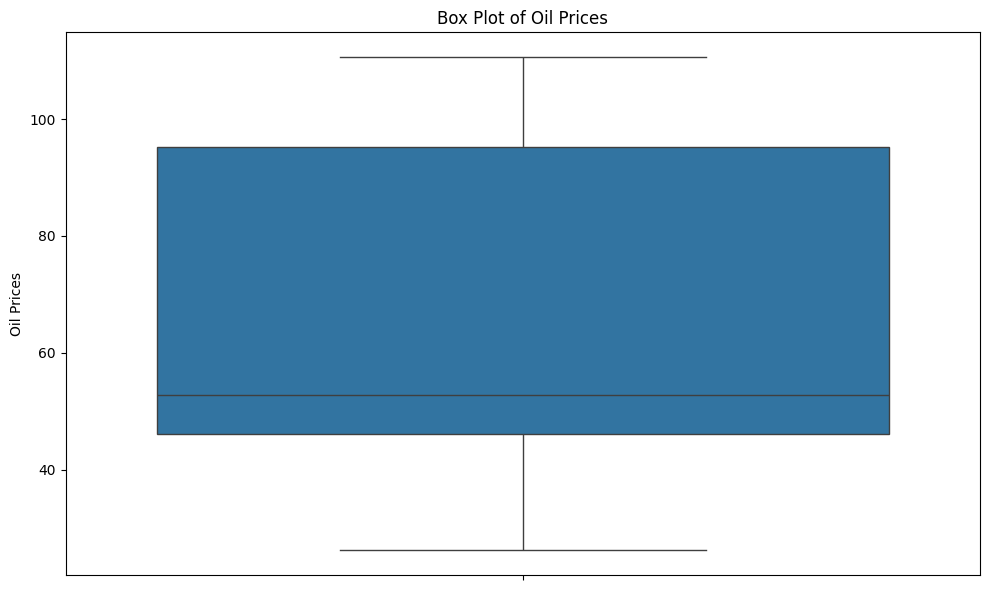

count    1.933305e+06
mean     6.672890e+01
std      2.549474e+01
min      2.619000e+01
25%      4.614000e+01
50%      5.274000e+01
75%      9.525000e+01
max      1.106200e+02
Name: dcoilwtico, dtype: float64

In [49]:
# For the column labeled "dcoilwtico," make a box plot.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, y='dcoilwtico')

# Include labels and a title.
plt.title('Box Plot of Oil Prices')
plt.ylabel('Oil Prices')

# Show plot
plt.tight_layout()
plt.show()

# Show the oil price summary information.
df_train['dcoilwtico'].describe()

** ** 
### <a id='toc1_10_5_'></a>[Mean imputation would be adequate for managing missing numerical values because oil prices don't contain any outliers.](#toc0_)
** **

In [50]:
# Calculate the number of duplicate rows in the dataframe 'df_train'
count_duplicate = df_train.duplicated().sum()

# Display the count of duplicate rows
count_duplicate 

0

In [51]:
def impute_missing_values(df, column_name, strategy='mean'):
    """
    Impute missing values in a specified column of a DataFrame using SimpleImputer.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to impute.
    strategy (str): The imputation strategy. Options are 'mean', 'median', 'most_frequent', or 'constant'.
                    Default is 'mean'.

    Returns:
    pd.DataFrame: A DataFrame with imputed values in the specified column.
    """
    # Create an instance of SimpleImputer with the specified strategy
    imputer = SimpleImputer(strategy=strategy)

    # Reshape the data to fit the imputer
    data_reshaped = df[[column_name]].values

    # Impute missing values in the specified column
    df[column_name] = imputer.fit_transform(data_reshaped)

    return df

# Check missing values
df_train = impute_missing_values(df_train, 'dcoilwtico', strategy='mean')


In [52]:
# Check for any remaining missing values in the 'dcoilwtico' column of df_train
# The isna() method returns a boolean DataFrame where True indicates missing values
# The sum() method counts the number of True values, effectively counting the missing values
missing_values_count = df_train['dcoilwtico'].isna().sum()

# Display the count of missing values in the 'dcoilwtico' column
missing_values_count

0

In [53]:
# Get the unique values in the 'transferred' column of df_train
# The unique() method returns an array of unique values present in the 'transferred' column
# Display the unique values in the 'transferred' column
df_train['transferred'].unique()

array([False, nan, True], dtype=object)

In [54]:
# Define a function to standardize values in a column
def standardize_value(value):
    # If the value is True, return 'Yes'
    if value is True:
        return 'Yes'
    # If the value is False, return 'No'
    elif value is False:
        return 'No'
    # If the value is NaN, return 'Not Applicable'
    elif pd.isna(value):
        return 'Not Applicable'
    # Otherwise, return the original value
    else:
        return value

# List of columns to standardize
columns_to_standardize = [
    'holiday_type', 'locale', 'locale_name', 'description', 'transferred'
]

# Apply the standardize_value function to each column in the columns_to_standardize list
for column in columns_to_standardize:
    df_train[column] = df_train[column].apply(standardize_value)

# Print the value counts for each standardized column to verify the changes
for column in columns_to_standardize:
    # Display the count of unique values in the column
    print(df_train[column].value_counts())
    # Print an empty line for better readability between the outputs of different columns
    print()


holiday_type
Not Applicable    2346168
Holiday            273504
Event               94248
Additional          63063
Transfer            15444
Work Day             7920
Bridge               4884
Name: count, dtype: int64

locale
Not Applicable    2346168
National           236181
Local              193215
Regional            29667
Name: count, dtype: int64

locale_name
Not Applicable                    2346168
Ecuador                            236181
Guayaquil                           18381
Riobamba                            16467
Latacunga                           14883
Guaranda                            14883
Quito                               13266
Ambato                              13101
Cuenca                               9933
Esmeraldas                           8316
Santo Domingo                        8283
El Carmen                            8283
Machala                              8283
Imbabura                             8283
Cayambe                              825

In [55]:
def count_duplicate_rows(df):
    """
    Analyze a DataFrame to calculate missing values percentage, count duplicates, and extract duplicate rows.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    dict: A dictionary containing the missing percentage, count of duplicates, and duplicate rows.
    """
    # Calculate the percentage of missing values in each column
    missing_percentage = (df.isnull().mean() * 100).round(2)

    # Count the number of duplicate rows
    count_duplicate = df.duplicated(subset=None, keep=False).sum()

    # Extract the duplicate rows
    duplicated_rows = df[df.duplicated(subset=None, keep=False)]

    # Print results
    print("Proportion of missing values in the dataset:")
    print(missing_percentage)
    print("\nThe shape of the dataset:", df.shape)
    print("\nNumber of duplicated rows in the dataset:", count_duplicate)

    # Return the results as a dictionary
    return df  #{
    #     'missing_percentage': missing_percentage,
    #     'count_duplicate': count_duplicate,
    #     'duplicated_rows': duplicated_rows
    # }

# Check for duplicates
results = count_duplicate_rows(df_train)


Proportion of missing values in the dataset:
id              0.0
date            0.0
store_nbr       0.0
family          0.0
sales           0.0
onpromotion     0.0
day             0.0
month           0.0
week            0.0
year            0.0
city            0.0
state           0.0
store_type      0.0
cluster         0.0
transactions    0.0
dcoilwtico      0.0
holiday_type    0.0
locale          0.0
locale_name     0.0
description     0.0
transferred     0.0
dtype: float64

The shape of the dataset: (2805231, 21)

Number of duplicated rows in the dataset: 0


In [56]:

# Identify columns with object data type
# select_dtypes(include=['object']) filters columns with object data type
# .columns returns the column names, and the list comprehension creates a list of these column names
object_columns = [col for col in df_train.select_dtypes(include=['object']).columns]

# Convert the identified object columns to category data type
# This can help reduce memory usage as category type is more memory efficient for columns with repetitive string values
df_train[object_columns] = df_train[object_columns].astype('category')

# Display the memory usage information of the DataFrame
# memory_usage='deep' provides a detailed memory usage report, including object-type columns
df_train.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805231 entries, 0 to 2805230
Data columns (total 21 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        category      
 4   sales         float64       
 5   onpromotion   int64         
 6   day           category      
 7   month         int32         
 8   week          int32         
 9   year          int32         
 10  city          category      
 11  state         category      
 12  store_type    category      
 13  cluster       int64         
 14  transactions  int64         
 15  dcoilwtico    float64       
 16  holiday_type  category      
 17  locale        category      
 18  locale_name   category      
 19  description   category      
 20  transferred   category      
dtypes: category(10), datetime64[ns](1), float64(2), int32(3), int64(5)
memory usage: 230.1 MB


In [57]:

def num_convert(df):
    # Select columns with float64 data type and convert them to float32
    float64_cols = df.select_dtypes(include=['float64'])
    df[float64_cols.columns] = float64_cols.astype('float32')

    # Select columns with float data type and downcast them to the smallest float subtype
    float_cols = df.select_dtypes(include=['float'])
    df[float_cols.columns] = float_cols.apply(pd.to_numeric, downcast='float')

    # Select columns with integer data type and downcast them to the smallest integer subtype
    int_cols = df.select_dtypes(include=['int'])
    df[int_cols.columns] = int_cols.apply(pd.to_numeric, downcast='integer')

    return df

# Apply the downcast_numeric function to the df_train DataFrame to optimize memory usage
df_train = num_convert(df_train)

# Display the memory usage information of the DataFrame
# memory_usage='deep' provides a detailed memory usage report, including object-type columns
df_train.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805231 entries, 0 to 2805230
Data columns (total 21 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int32         
 1   date          datetime64[ns]
 2   store_nbr     int8          
 3   family        category      
 4   sales         float32       
 5   onpromotion   int16         
 6   day           category      
 7   month         int8          
 8   week          int8          
 9   year          int16         
 10  city          category      
 11  state         category      
 12  store_type    category      
 13  cluster       int8          
 14  transactions  int16         
 15  dcoilwtico    float32       
 16  holiday_type  category      
 17  locale        category      
 18  locale_name   category      
 19  description   category      
 20  transferred   category      
dtypes: category(10), datetime64[ns](1), float32(2), int16(3), int32(1), int8(4)
memory usage: 107.0 MB


In [58]:
# Display the unique values present in the 'day' column of the df_train DataFrame
# This provides insight into the different values or categories that are contained within the 'day' column
df_train['day'].unique()

['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [59]:
# Identify columns with the 'category' data type in the df_train DataFrame
categorical_columns = df_train.select_dtypes('category').columns

# Display the names of the categorical columns
# This provides insight into which columns have been converted to or are stored as categorical data types
categorical_columns

Index(['family', 'day', 'city', 'state', 'store_type', 'holiday_type',
       'locale', 'locale_name', 'description', 'transferred'],
      dtype='object')

## <a id='toc1_11_'></a>[`Univariate Analysis`](#toc0_)
Here is the section to explore, analyze, visualize each variable independently of the others.

In [60]:
# find unique values in each column of the dataset

for column in df_train.columns:
    print(f'{column}: {df_train[column].nunique()} unique values')


id: 2755104 unique values
date: 1682 unique values
store_nbr: 54 unique values
family: 33 unique values
sales: 379092 unique values
onpromotion: 362 unique values
day: 7 unique values
month: 12 unique values
week: 53 unique values
year: 5 unique values
city: 22 unique values
state: 16 unique values
store_type: 5 unique values
cluster: 17 unique values
transactions: 4993 unique values
dcoilwtico: 995 unique values
holiday_type: 7 unique values
locale: 4 unique values
locale_name: 25 unique values
description: 102 unique values
transferred: 3 unique values


In [61]:
# Descriptive statistics for  sales
pd.DataFrame(df_train['sales'].describe())

,sales
count,2.805231e+06
mean,3.900543e+02
std,1.148189e+03
min,0.000000e+00
25%,0.000000e+00
50%,1.700000e+01
75%,2.310000e+02
max,1.247170e+05


In [62]:
# Descriptive statistics on the family column 
pd.DataFrame(df_train['family'].value_counts())

,count
family,
AUTOMOTIVE,85007
HOME APPLIANCES,85007
SCHOOL AND OFFICE SUPPLIES,85007
PRODUCE,85007
PREPARED FOODS,85007
POULTRY,85007
PLAYERS AND ELECTRONICS,85007
PET SUPPLIES,85007
PERSONAL CARE,85007


<Axes: >

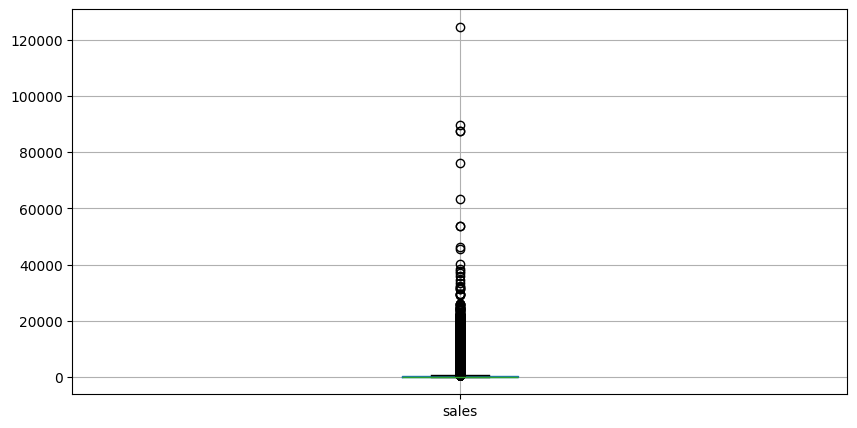

In [63]:
#  plot box plots for sales column

df_train.boxplot(column='sales', figsize=(10,5))

<Axes: xlabel='sales', ylabel='Density'>

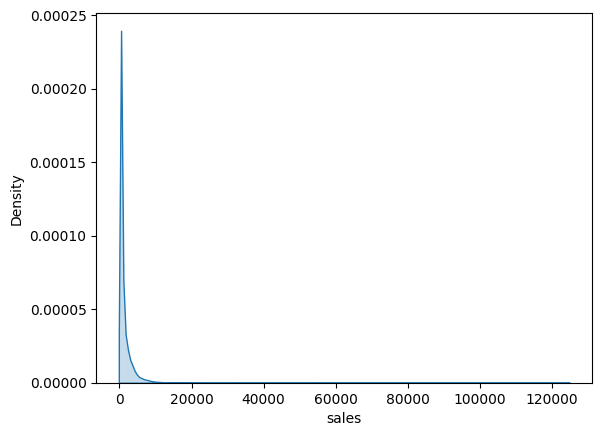

In [64]:
# plot KDE plot for the sales column

sns.kdeplot(df_train['sales'], shade=True)

<Axes: xlabel='dcoilwtico', ylabel='Density'>

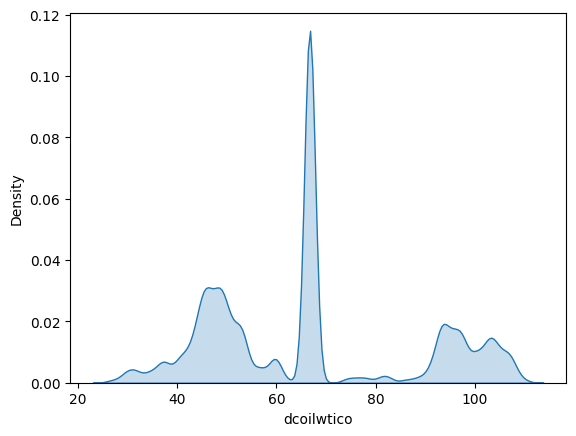

In [65]:
# Visualize KDE plot for dcoilwtico

sns.kdeplot(df_train['dcoilwtico'], shade=True)

<Axes: xlabel='store_nbr', ylabel='Density'>

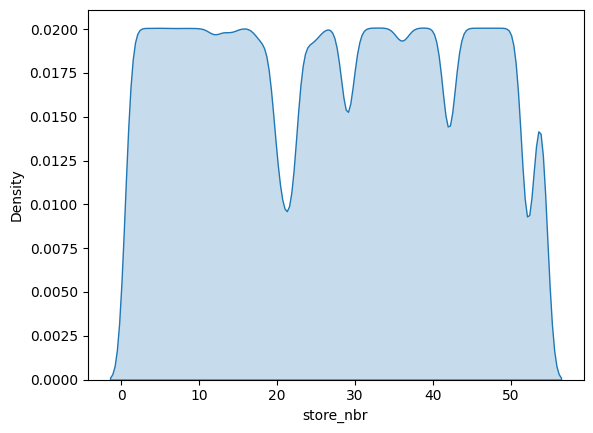

In [66]:
# plot KDE plot for store_nbr 

sns.kdeplot(df_train['store_nbr'], shade=True)


<Axes: xlabel='cluster', ylabel='count'>

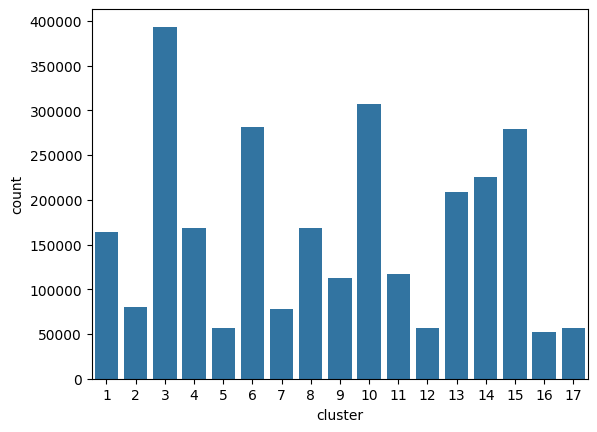

In [67]:
# Visualize cluster

sns.countplot(x='cluster', data=df_train)

<Axes: xlabel='cluster', ylabel='Density'>

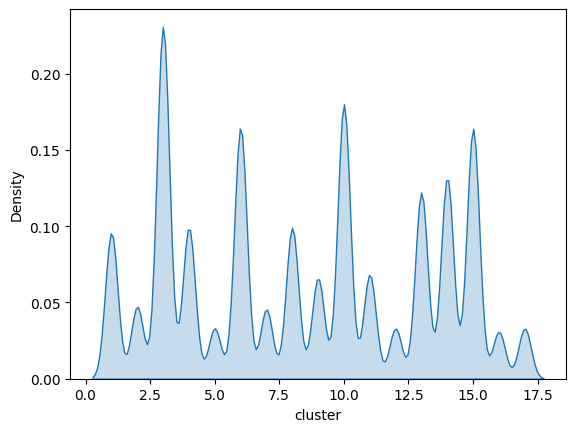

In [68]:
#  view cluster as KDE plot

sns.kdeplot(df_train['cluster'], shade=True)

<Axes: xlabel='id', ylabel='Density'>

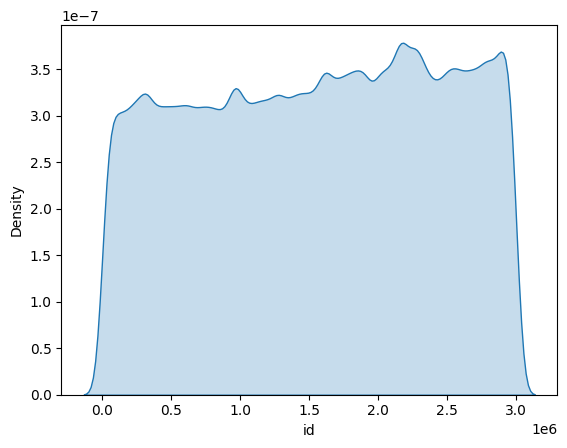

In [69]:
# Use KDE plot to visualize id

sns.kdeplot(df_train['id'], shade=True)

<Axes: xlabel='onpromotion', ylabel='Density'>

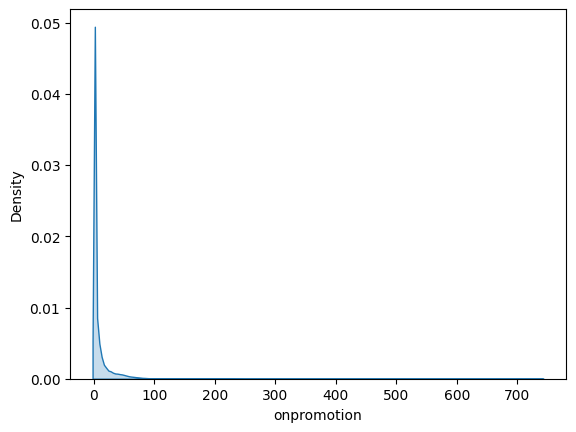

In [70]:
# visualize onpromotion with KDE plot

sns.kdeplot(df_train['onpromotion'], shade=True)


## <a id='toc1_12_'></a>[`Bivariate & Multivariate Analysis`](#toc0_)
Here is the section to explore, analyze, visualize each variable in relation to the others.

In [71]:
# Describe the numerical values of the dataset 

df_train.describe()

,id,date,store_nbr,sales,onpromotion,month,week,year,cluster,transactions,dcoilwtico
count,2.805231e+06,2805231,2.805231e+06,2.805231e+06,2.805231e+06,2.805231e+06,2.805231e+06,2.805231e+06,2.805231e+06,2.805231e+06,2.805231e+06
mean,1.551084e+06,2015-05-22 20:17:18.577999360,2.694062e+01,3.900543e+02,2.848028e+00,6.255167e+00,2.535445e+01,2.014912e+03,8.533815e+00,1.697071e+03,6.672893e+01
min,5.610000e+02,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.013000e+03,1.000000e+00,5.000000e+00,2.619000e+01
25%,8.062475e+05,2014-03-30 00:00:00,1.300000e+01,0.000000e+00,0.000000e+00,3.000000e+00,1.300000e+01,2.014000e+03,4.000000e+00,1.046000e+03,4.875000e+01
50%,1.588372e+06,2015-06-13 00:00:00,2.700000e+01,1.700000e+01,0.000000e+00,6.000000e+00,2.500000e+01,2.015000e+03,9.000000e+00,1.395000e+03,6.672890e+01
75%,2.294960e+06,2016-07-14 00:00:00,4.000000e+01,2.310000e+02,0.000000e+00,9.000000e+00,3.800000e+01,2.016000e+03,1.300000e+01,2.081000e+03,8.576000e+01
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,1.200000e+01,5.300000e+01,2.017000e+03,1.700000e+01,8.359000e+03,1.106200e+02
std,8.653909e+05,NaN,1.560771e+01,1.148189e+03,1.276018e+01,3.362701e+00,1.468577e+01,1.346665e+00,4.724030e+00,9.668317e+02,2.116491e+01


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'store_nbr'}>],
       [<Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'onpromotion'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'week'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'cluster'}>],
       [<Axes: title={'center': 'transactions'}>,
        <Axes: title={'center': 'dcoilwtico'}>, <Axes: >]], dtype=object)

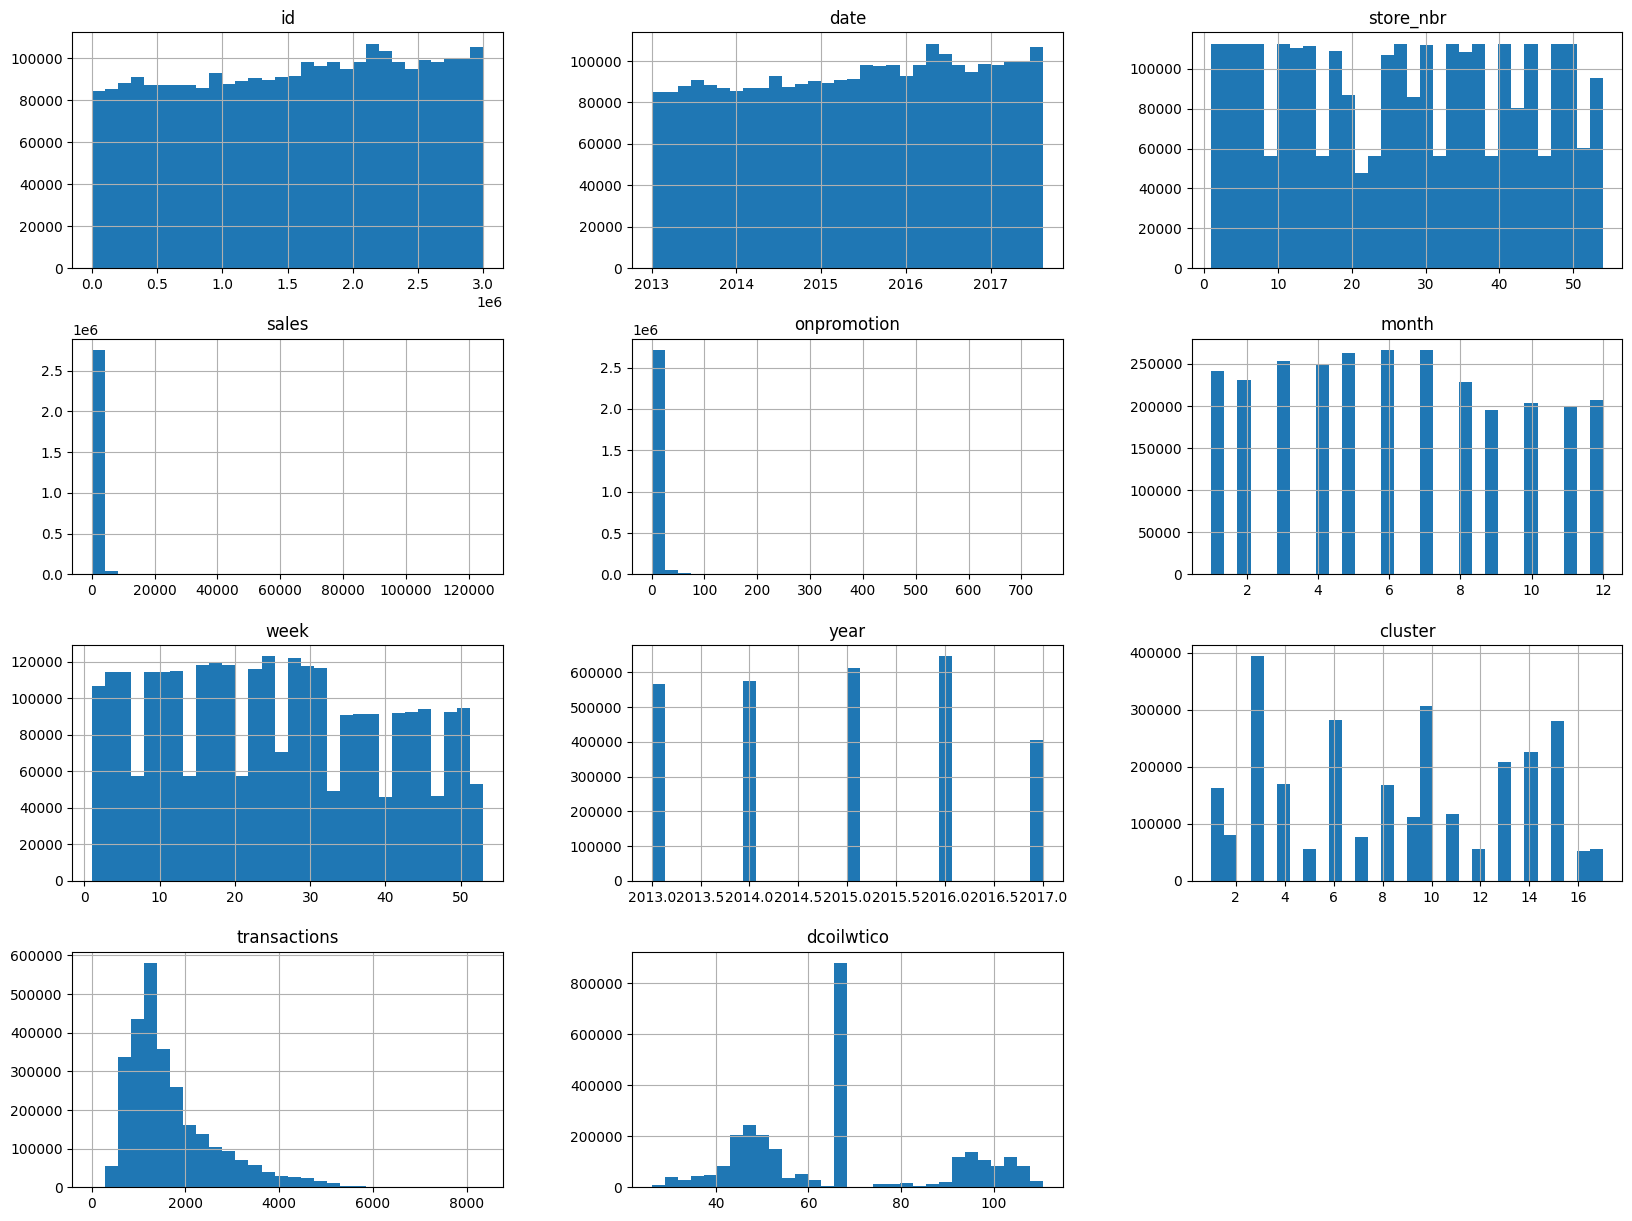

In [72]:
# Plotting histograms on the columns

df_train.hist(bins=30, figsize=(20,15))

In [73]:
# Determine the average sales over various time periods.
# Calculate average daily sales
daily_sales = train_4_copy.groupby('day')['sales'].mean().reset_index()

# Calculate average weekly sales
weekly_sales = train_4_copy.groupby('week')['sales'].mean().reset_index()

# Calculate average monthly sales
monthly_sales = train_4_copy.groupby('month')['sales'].mean().reset_index()

# Calculate average yearly sales
annualy_sales = train_4_copy.groupby('year')['sales'].mean().reset_index()


In [74]:
# Map the day names to ensure the week starts from Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['day'] = pd.Categorical(daily_sales['day'], categories=days_order, ordered=True)

# Sort the data by day names to ensure the correct order in the plot
daily_sales = daily_sales.sort_values('day')

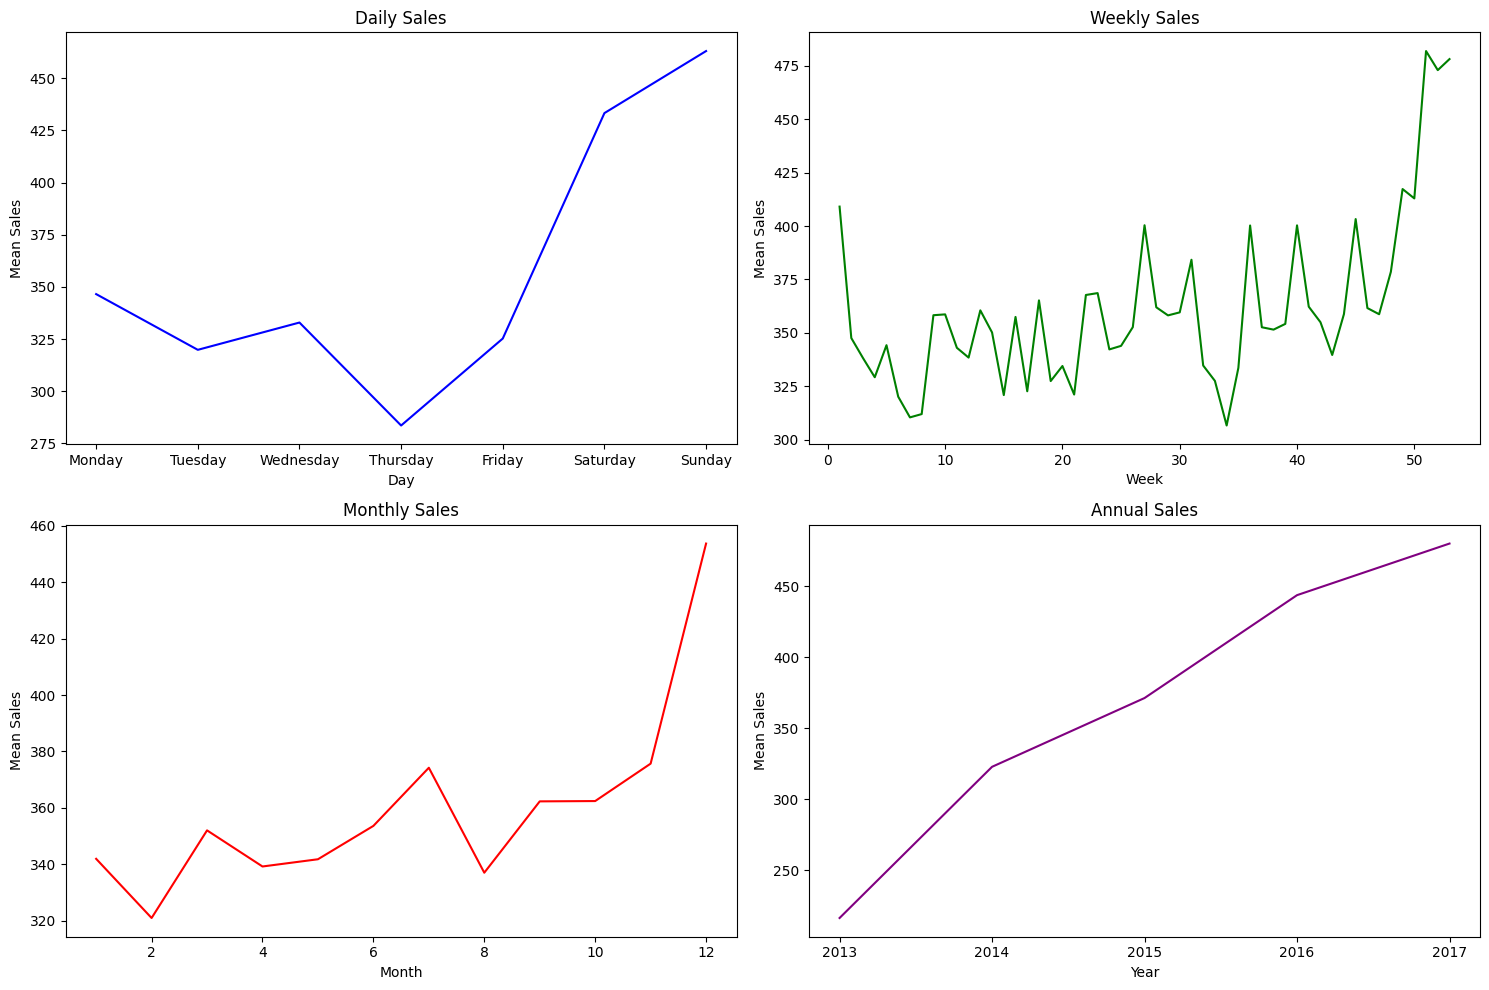

In [75]:
# Create a 2x2 grid of subplots with a size of 15x10 inches
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot daily sales data on the top-left subplot
axs[0, 0].plot(daily_sales['day'], daily_sales['sales'], color='blue')
axs[0, 0].set_title('Daily Sales')  # Set title for daily sales plot
axs[0, 0].set_xlabel('Day')        # Label x-axis as 'Day'
axs[0, 0].set_ylabel('Mean Sales')  # Label y-axis as 'Mean Sales'

# Plot weekly sales data on the top-right subplot
axs[0, 1].plot(weekly_sales['week'], weekly_sales['sales'], color='green')
axs[0, 1].set_title('Weekly Sales')  # Set title for weekly sales plot
axs[0, 1].set_xlabel('Week')         # Label x-axis as 'Week'
axs[0, 1].set_ylabel('Mean Sales')   # Label y-axis as 'Mean Sales'

# Plot monthly sales data on the bottom-left subplot
axs[1, 0].plot(monthly_sales['month'], monthly_sales['sales'], color='red')
axs[1, 0].set_title('Monthly Sales')  # Set title for monthly sales plot
axs[1, 0].set_xlabel('Month')         # Label x-axis as 'Month'
axs[1, 0].set_ylabel('Mean Sales')    # Label y-axis as 'Mean Sales'

# Plot annual sales data on the bottom-right subplot
axs[1, 1].plot(annualy_sales['year'], annualy_sales['sales'], color='purple')
axs[1, 1].set_title('Annual Sales')  # Set title for annual sales plot
axs[1, 1].set_xlabel('Year')         # Label x-axis as 'Year'
axs[1, 1].set_ylabel('Mean Sales')   # Label y-axis as 'Mean Sales'
axs[1, 1].set_xticks(annualy_sales['year'].astype(int))  # Set x-ticks for years

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the plots
plt.show()


## <a id='toc1_13_'></a>[Feature Processing & Engineering](#toc0_)
Here is the section to **clean**, **process** the dataset and **create new features**.

`Impute Missing Values`

In [76]:
df_train.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
day             0
month           0
week            0
year            0
city            0
state           0
store_type      0
cluster         0
transactions    0
dcoilwtico      0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

## <a id='toc1_14_'></a>[Answering Hypothesis Questions](#toc0_)

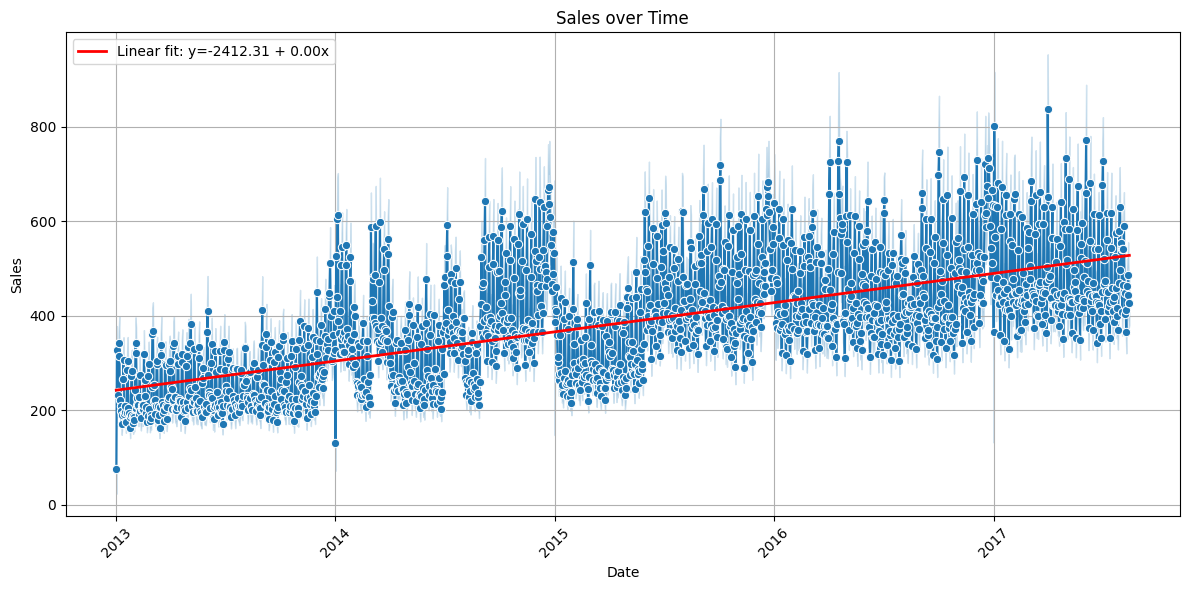

{'slope': 1.9565139824873213e-06,
 'intercept': -2412.311239884249,
 'r_value': 0.07169136503293486,
 'p_value': 0.0,
 'std_err': 1.6252231776487017e-08}

In [77]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_train, x='date', y='sales', marker='o')
plt.title('Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_train['date'].astype('int64') // 10**9, df_train['sales'])

# Plot the regression line
plt.plot(df_train['date'], intercept + slope * (df_train['date'].astype('int64') // 10**9), color='red', lw=2, label=f'Linear fit: y={intercept:.2f} + {slope:.2f}x')
plt.legend()

# Display the plot
plt.show()

# Summary of linear regression
{
    'slope': slope,
    'intercept': intercept,
    'r_value': r_value,
    'p_value': p_value,
    'std_err': std_err
}


### <a id='toc1_14_1_'></a>[Deduction](#toc0_)
** **
`Null Hypothesis (H0):`
There is no significant relationship between the date and the sales figures in the dataset.

`Alternative Hypothesis (H1):`
There is a significant relationship between the date and the sales figures in the dataset.

`Linear Regression Analysis:`
The key statistics from the regression analysis are as follows:

**Slope: 1.96e-06**

**Intercept: -2412.31**

**R-squared value (R²): 0.0717**

**P-value: 0.0**

**Standard Error: 1.625e-08**


`Interpretation:`
Slope: The slope of the regression line is 1.96e-06, indicating a very slight positive relationship between date and sales. This means that as time progresses, sales figures show a minor increase.

`Intercept:` The intercept is -2412.31, which indicates the starting point of the regression line when the date is zero. This value is more abstract in terms of direct interpretation but is part of the regression equation.

`R-squared value (R²):` The R² value is 0.0717, suggesting that the model explains only about 7.17% of the variability in sales data. While this is a low value, it indicates some degree of relationship.

`P-value:` The p-value is 0.0, which is significantly lower than the common significance level of 0.05. This indicates strong evidence against the null hypothesis, suggesting that the relationship between date and sales is statistically significant.

`Standard Error:` The standard error of 1.625e-08 indicates the precision of the estimated slope. A very small standard error suggests that the estimate is precise.

### <a id='toc1_14_2_'></a>[Conclusion:](#toc0_)
Based on the linear regression analysis, there is a statistically significant relationship between the date and the sales figures in the dataset. The low p-value leads us to reject the null hypothesis in favor of the alternative hypothesis, indicating a significant relationship.

While the R² value is relatively low, it does show that the date can explain a small part of the variability in sales figures. Thus, despite the weak positive relationship, the time element does play a significant role in influencing sales figures in this dataset.


**we do not accept the null hypothesis.**
** **

## <a id='toc1_15_'></a>[Answering Analytical Questions](#toc0_)

### <a id='toc1_15_1_'></a>[Is the train dataset complete (has all the required dates)?](#toc0_)

In [78]:

# We'll create a date range from the minimum to the maximum date in the dataset
date_range = pd.date_range(start=train_4_copy['date'].min(), end=train_4_copy['date'].max())

# Check for any missing dates in the dataset
dates_missing = date_range.difference(train_4_copy['date'])
is_complete = dates_missing.empty

is_complete, dates_missing

(False,
 DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None))

In [79]:
# We'll create a date range from the minimum to the maximum date in the dataset
date_range = pd.date_range(start=train_4_copy['date'].min(), end=train_4_copy['date'].max())

# Check for any missing dates in the dataset
dates_missing = date_range.difference(train_4_copy['date'])
is_complete = dates_missing.empty

is_complete, dates_missing

(False,
 DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None))

### <a id='toc1_15_2_'></a>[Which dates have the lowest and highest sales for each year (excluding days the store was closed)?](#toc0_)

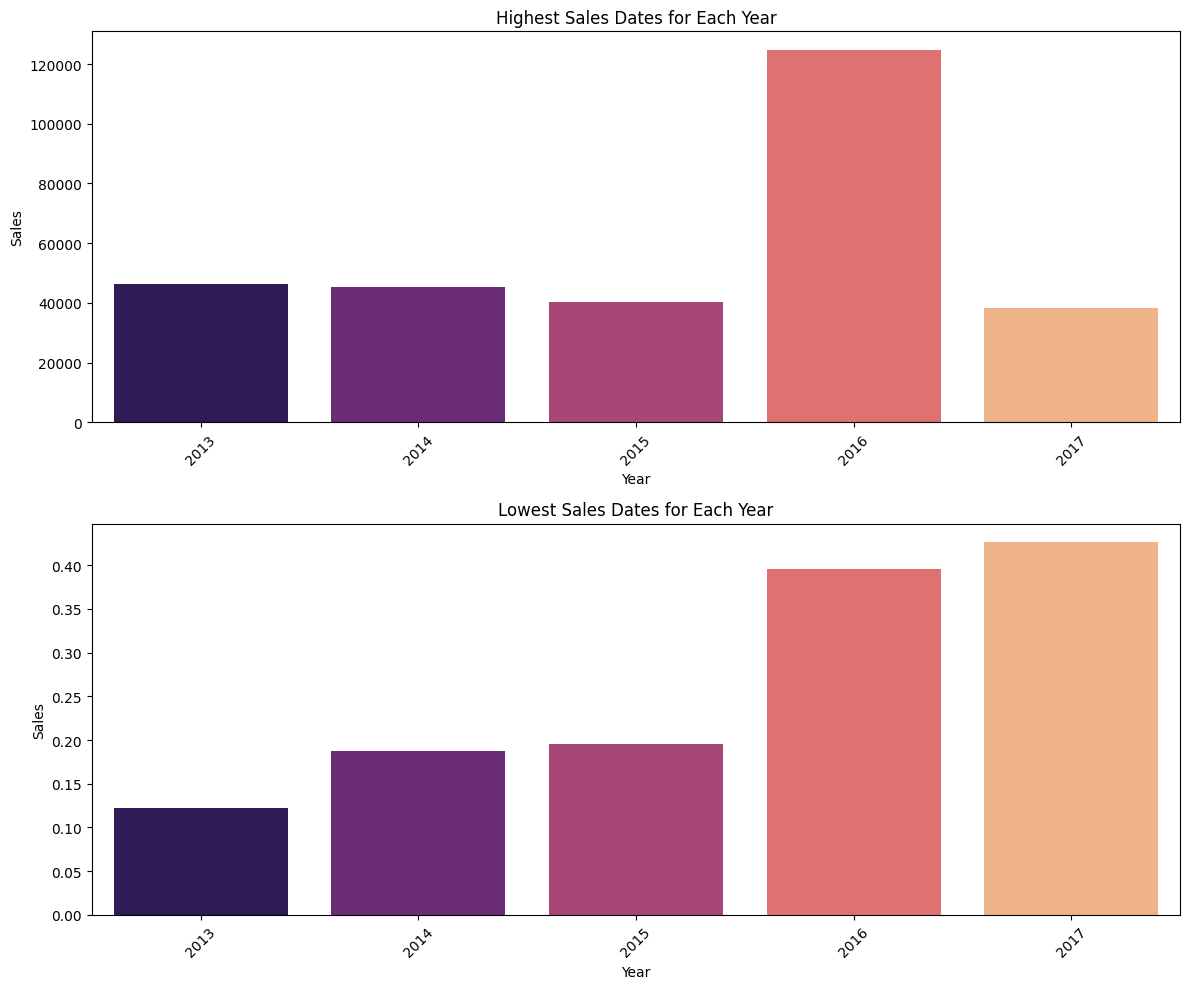

In [80]:

# Filter the dataframe to include only rows where sales are greater than zero
df_nonzero_sales = df_train[df_train['sales'] != 0]

# Identify the dates with the highest sales for each year and select relevant columns
highest_sales_dates = df_nonzero_sales.loc[df_nonzero_sales.groupby('year')['sales'].idxmax()][['year', 'date', 'sales']]

# Identify the dates with the lowest sales for each year and select relevant columns
lowest_sales_dates = df_nonzero_sales.loc[df_nonzero_sales.groupby('year')['sales'].idxmin()][['year', 'date', 'sales']]

# Create a figure and two subplots for highest and lowest sales
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot the highest sales dates
sns.barplot(data=highest_sales_dates, x='date', y='sales', ax=ax[0], palette='magma')
ax[0].set_title('Highest Sales Dates for Each Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Sales')
ax[0].set_xticklabels(highest_sales_dates['year'].astype(str), rotation=45)

# Plot the lowest sales dates
sns.barplot(data=lowest_sales_dates, x='date', y='sales', ax=ax[1], palette='magma')
ax[1].set_title('Lowest Sales Dates for Each Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Sales')
ax[1].set_xticklabels(lowest_sales_dates['year'].astype(str), rotation=45)

plt.tight_layout()
plt.show()

### <a id='toc1_15_3_'></a>[Compare the sales for each month across the years and determine which month of which year had the highest sales.](#toc0_)

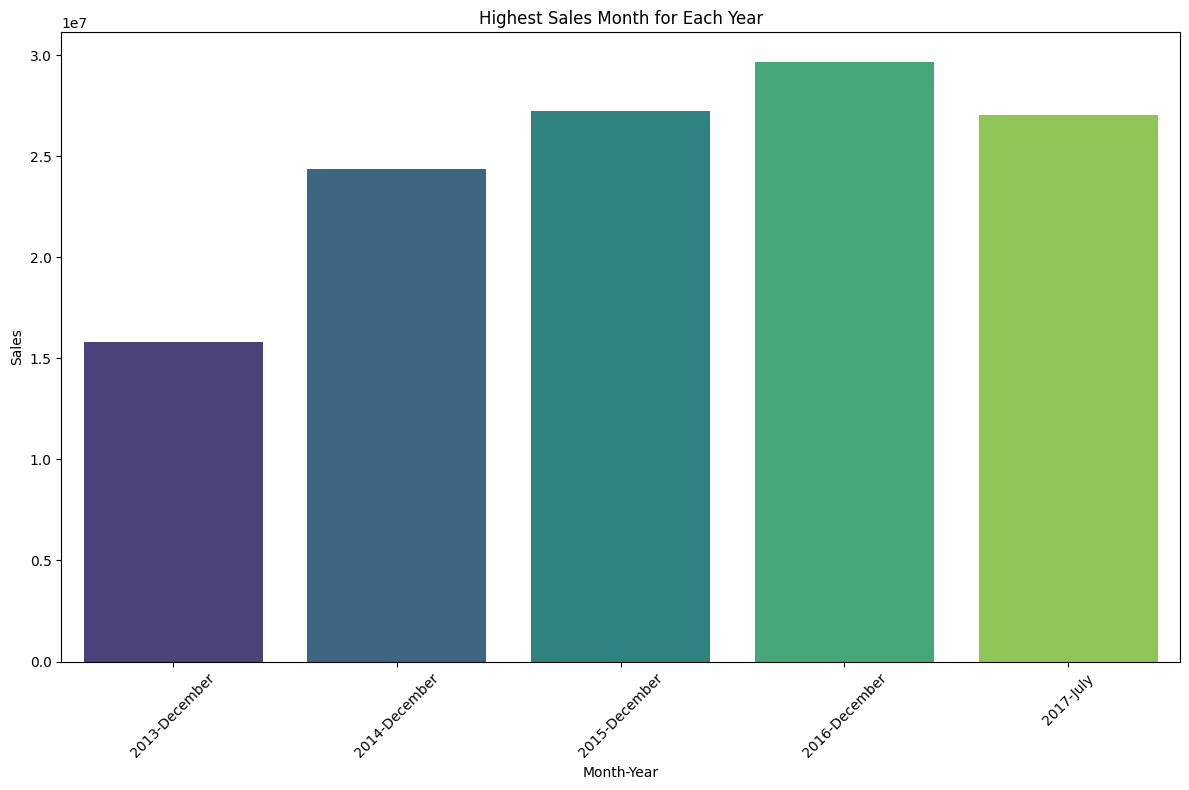

In [81]:


# Group by 'year' and 'month' and sum the sales
high_yr_mth_sales = train_4_copy.groupby(['year', 'month'])['sales'].sum().reset_index()

# Get the month with the highest sales for each year
highest_sales_per_year = high_yr_mth_sales.loc[high_yr_mth_sales.groupby('year')['sales'].idxmax()]

# Convert numerical month to text month
highest_sales_per_year['month'] = highest_sales_per_year['month'].apply(lambda x: calendar.month_name[x])

# Combine 'year' and 'month' into a single column for plotting
highest_sales_per_year['year_month'] = highest_sales_per_year['year'].astype(str) + '-' + highest_sales_per_year['month']

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=highest_sales_per_year, x='year_month', y='sales', palette='viridis')

# Adding labels and title
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Highest Sales Month for Each Year')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



### <a id='toc1_15_4_'></a>[Did the earthquake impact sales?](#toc0_)

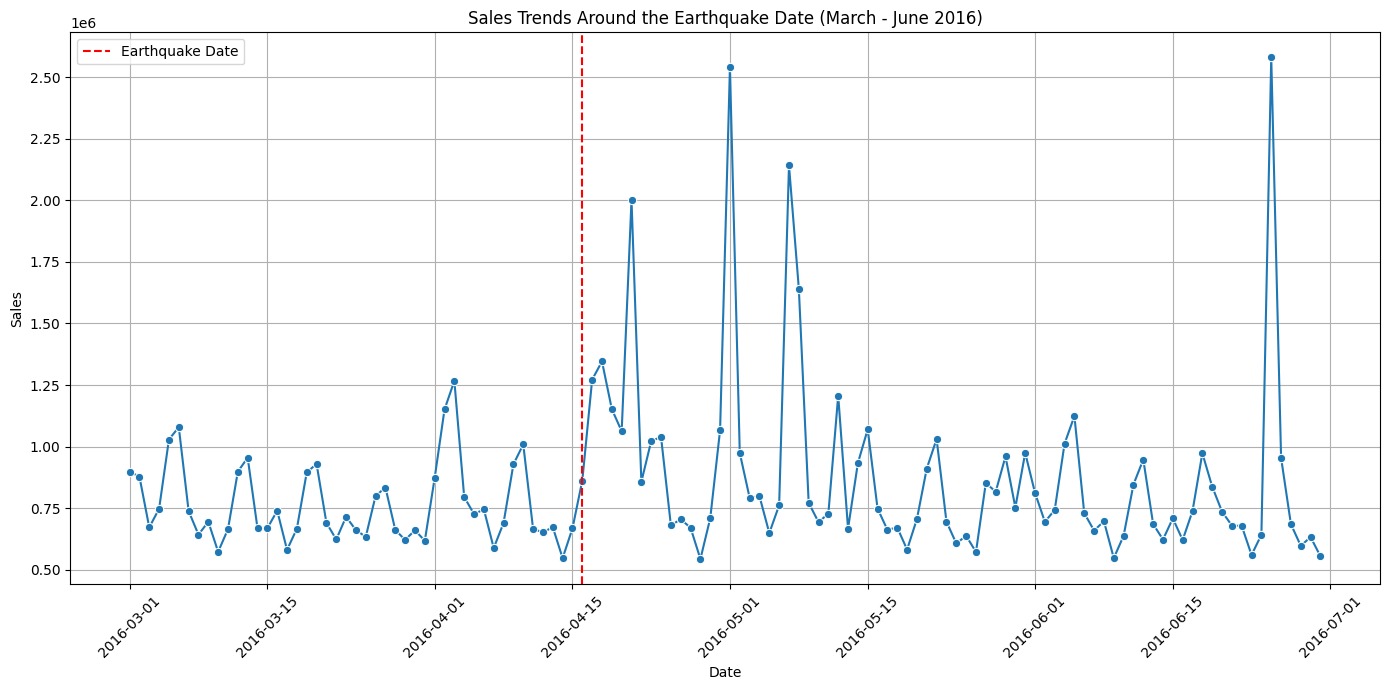

In [82]:

# Filter data around the earthquake date to observe changes in sales
# Define the earthquake date
earthquake_date = pd.Timestamp('2016-04-16')

# Filter data for the months before and after the earthquake
earthquake_impact_window = df_train[(df_train['date'] >= '2016-03-01') & (df_train['date'] <= '2016-06-30')]

# Group by date and sum sales to observe changes
earthquake_sales_trends = earthquake_impact_window.groupby('date')['sales'].sum().reset_index()

# Plotting to visualize sales trends around the earthquake
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='sales', data=earthquake_sales_trends, marker='o')
plt.title('Sales Trends Around the Earthquake Date (March - June 2016)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.axvline(x=earthquake_date, color='red', linestyle='--', label='Earthquake Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### <a id='toc1_15_4_1_'></a>[Observations from the Graph:](#toc0_)
- Pre-Earthquake Sales: Prior to the earthquake, sales show a general trend of oscillation with no significant peaks. This is typical for regular business operations without extraordinary external influences.
- Post-Earthquake Sales: Following the earthquake, there appears to be an increase in sales volume on certain dates, suggesting that the earthquake might have influenced buying patterns. Peaks in sales could potentially indicate a surge in purchases of essentials due to relief efforts and personal preparedness by the population.
** **

In [83]:
df_train.head(1)

,id,date,store_nbr,family,sales,onpromotion,day,month,week,year,city,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,Tuesday,1,1,2013,Salinas,Santa Elena,D,1,770,66.728905,Holiday,National,Ecuador,Primer dia del ano,No


### <a id='toc1_15_5_'></a>[Are certain stores or groups of stores selling more products? (Cluster, city, state, type)](#toc0_)

cluster
14    160506944.0
6     116566608.0
8     109790136.0
11    102575536.0
10     87061984.0
3      77061408.0
13     73558096.0
5      63229436.0
15     56239800.0
1      55404392.0
4      50414608.0
17     33544082.0
9      31117482.0
2      29479162.0
12     18362482.0
7      15767674.0
16     13512884.0
Name: sales, dtype: float32 city
Quito            5.672724e+08
Guayaquil        1.253970e+08
Cuenca           5.012384e+07
Ambato           4.108559e+07
Santo Domingo    3.653868e+07
Machala          3.403365e+07
Cayambe          2.882266e+07
Latacunga        2.154652e+07
Daule            1.956508e+07
Loja             1.922940e+07
Babahoyo         1.812002e+07
Esmeraldas       1.668415e+07
Libertad         1.562185e+07
Quevedo          1.445786e+07
Manta            1.430535e+07
Guaranda         1.327045e+07
Ibarra           1.163564e+07
Salinas          1.162118e+07
Riobamba         1.158096e+07
El Carmen        1.128790e+07
Playas           7.805802e+06
Puyo             4.1867

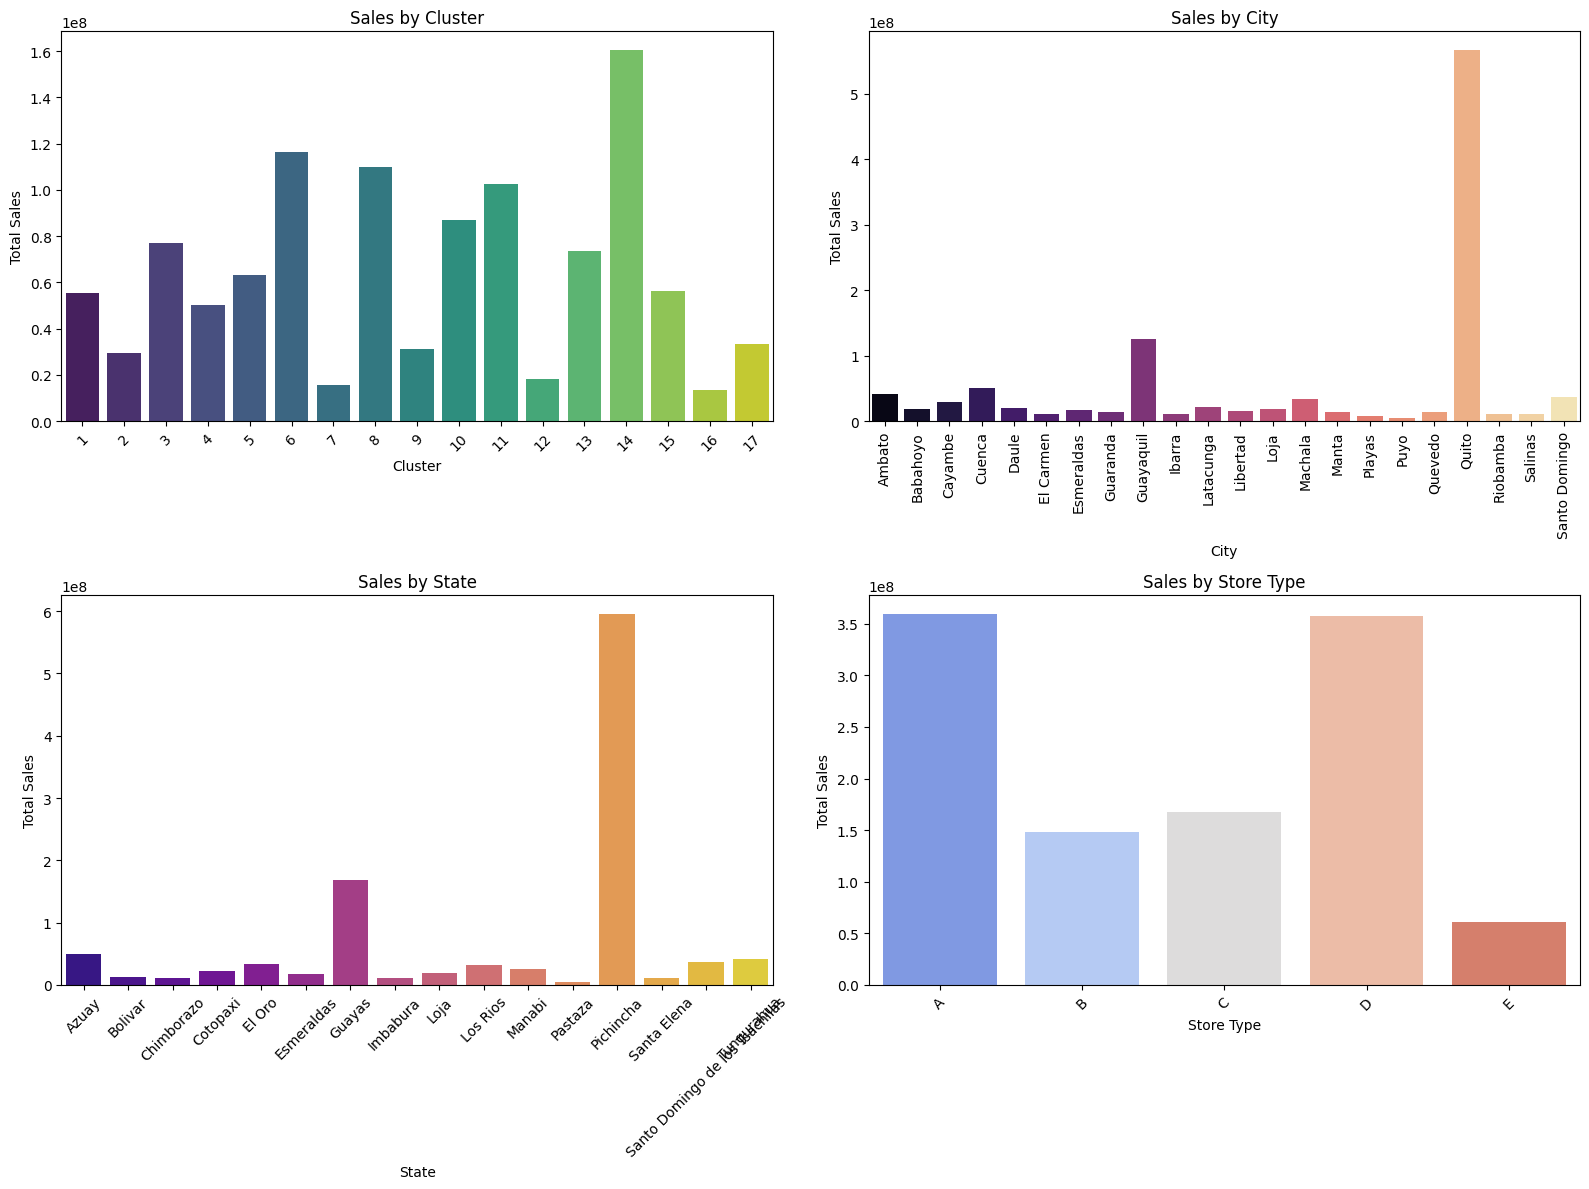

In [84]:

# Analyze sales based on different categories such as cluster, city, state, and store type

# Summing sales for each cluster
sales_by_cluster = df_train.groupby('cluster')['sales'].sum().sort_values(ascending=False)

# Summing sales for each city
sales_by_city = df_train.groupby('city')['sales'].sum().sort_values(ascending=False)

# Summing sales for each state
sales_by_state = df_train.groupby('state')['sales'].sum().sort_values(ascending=False)

# Summing sales for each store type
sales_by_store_type = df_train.groupby('store_type')['sales'].sum().sort_values(ascending=False)

print(sales_by_cluster, sales_by_city, sales_by_state, sales_by_store_type)

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot sales by cluster
sns.barplot(x=sales_by_cluster.index, y=sales_by_cluster.values, ax=axs[0, 0], palette="viridis")
axs[0, 0].set_title('Sales by Cluster')
axs[0, 0].set_xlabel('Cluster')
axs[0, 0].set_ylabel('Total Sales')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot sales by city
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, ax=axs[0, 1], palette="magma")
axs[0, 1].set_title('Sales by City')
axs[0, 1].set_xlabel('City')
axs[0, 1].set_ylabel('Total Sales')
axs[0, 1].tick_params(axis='x', rotation=90)

# Plot sales by state
sns.barplot(x=sales_by_state.index, y=sales_by_state.values, ax=axs[1, 0], palette="plasma")
axs[1, 0].set_title('Sales by State')
axs[1, 0].set_xlabel('State')
axs[1, 0].set_ylabel('Total Sales')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot sales by store type
sns.barplot(x=sales_by_store_type.index, y=sales_by_store_type.values, ax=axs[1, 1], palette="coolwarm")
axs[1, 1].set_title('Sales by Store Type')
axs[1, 1].set_xlabel('Store Type')
axs[1, 1].set_ylabel('Total Sales')
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()



### <a id='toc1_15_6_'></a>[Are sales affected by promotions, oil prices and holidays?](#toc0_)

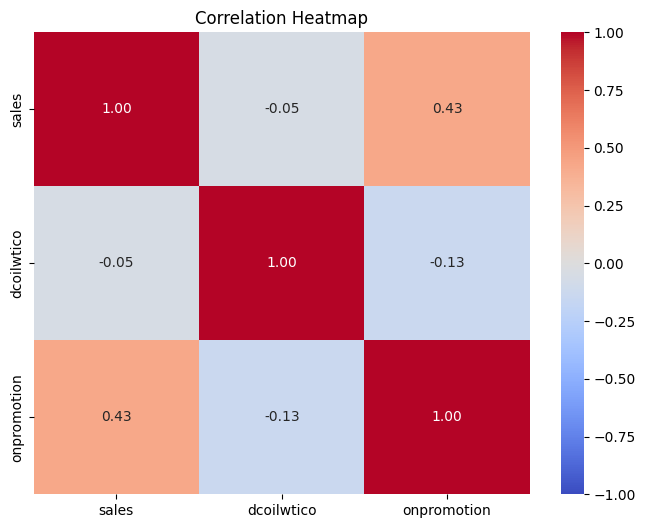

onpromotion
0       175.461807
1       468.771332
2       660.854431
3       866.165955
4       966.990540
          ...     
719    6681.000000
720    6154.000000
722    5846.000000
726    6044.000000
741    7517.000000
Name: sales, Length: 362, dtype: float32 -0.04803866370243943 holiday_type
Additional        523.607849
Bridge            489.011047
Event             450.698883
Holiday           399.285675
Not Applicable           NaN
Transfer          485.743622
Work Day          418.677216
Name: sales, dtype: float32


In [85]:


# Analyzing the effect of promotions, oil prices, and holidays on sales

# Grouping by promotions and calculating average sales
promotion_sales = df_train.groupby('onpromotion')['sales'].mean()

# Correlation between oil prices and sales
oil_price_correlation = df_train['sales'].corr(df_train['dcoilwtico'])

# Grouping by holiday status and calculating average sales
holiday_sales = df_train[df_train['holiday_type'] != 'Not Applicable'].groupby('holiday_type')['sales'].mean()


# Calculate the correlation matrix
correlation_matrix = df_train[['sales', 'dcoilwtico', 'onpromotion']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

print(promotion_sales, oil_price_correlation, holiday_sales)

- Promotions: If average sales are higher on promotional days, it indicates that promotions positively affect sales.
- Oil Prices: A negative correlation between sales and oil prices would suggest that higher oil prices are associated with lower sales.
- Holidays: Comparing sales during holidays vs. non-holidays can show whether holidays have a significant impact on sales.
** **

### <a id='toc1_15_7_'></a>[What analysis can we get from the date and its extractable features](#toc0_)

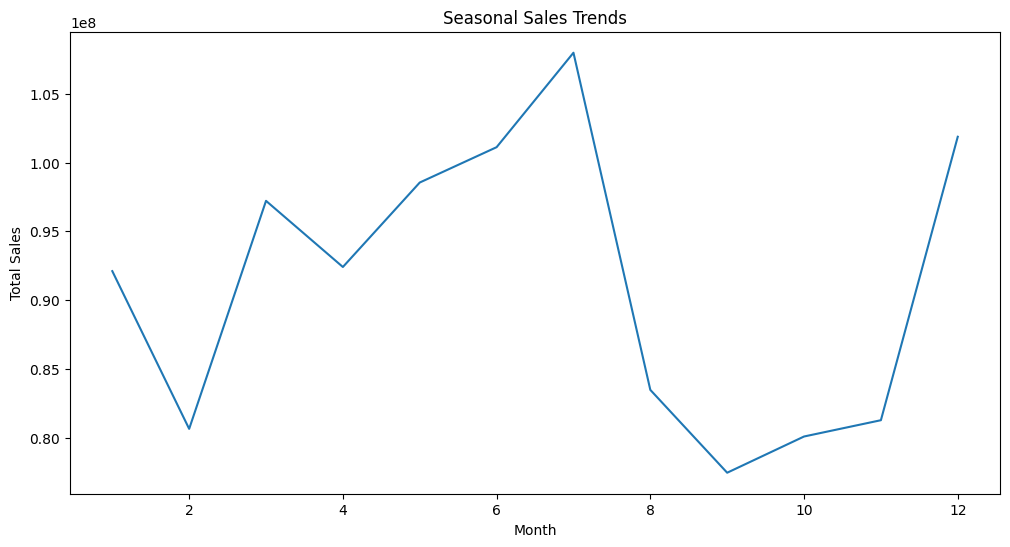

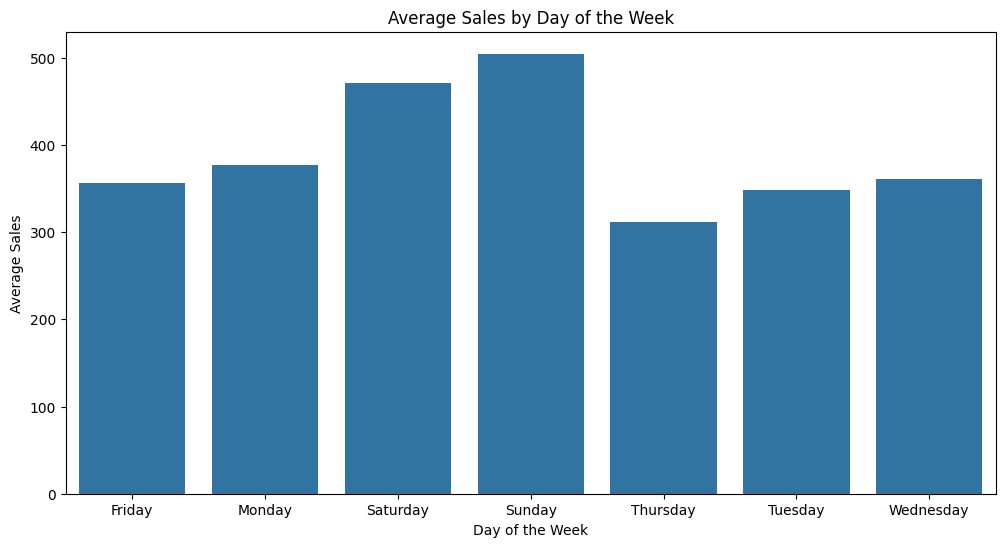

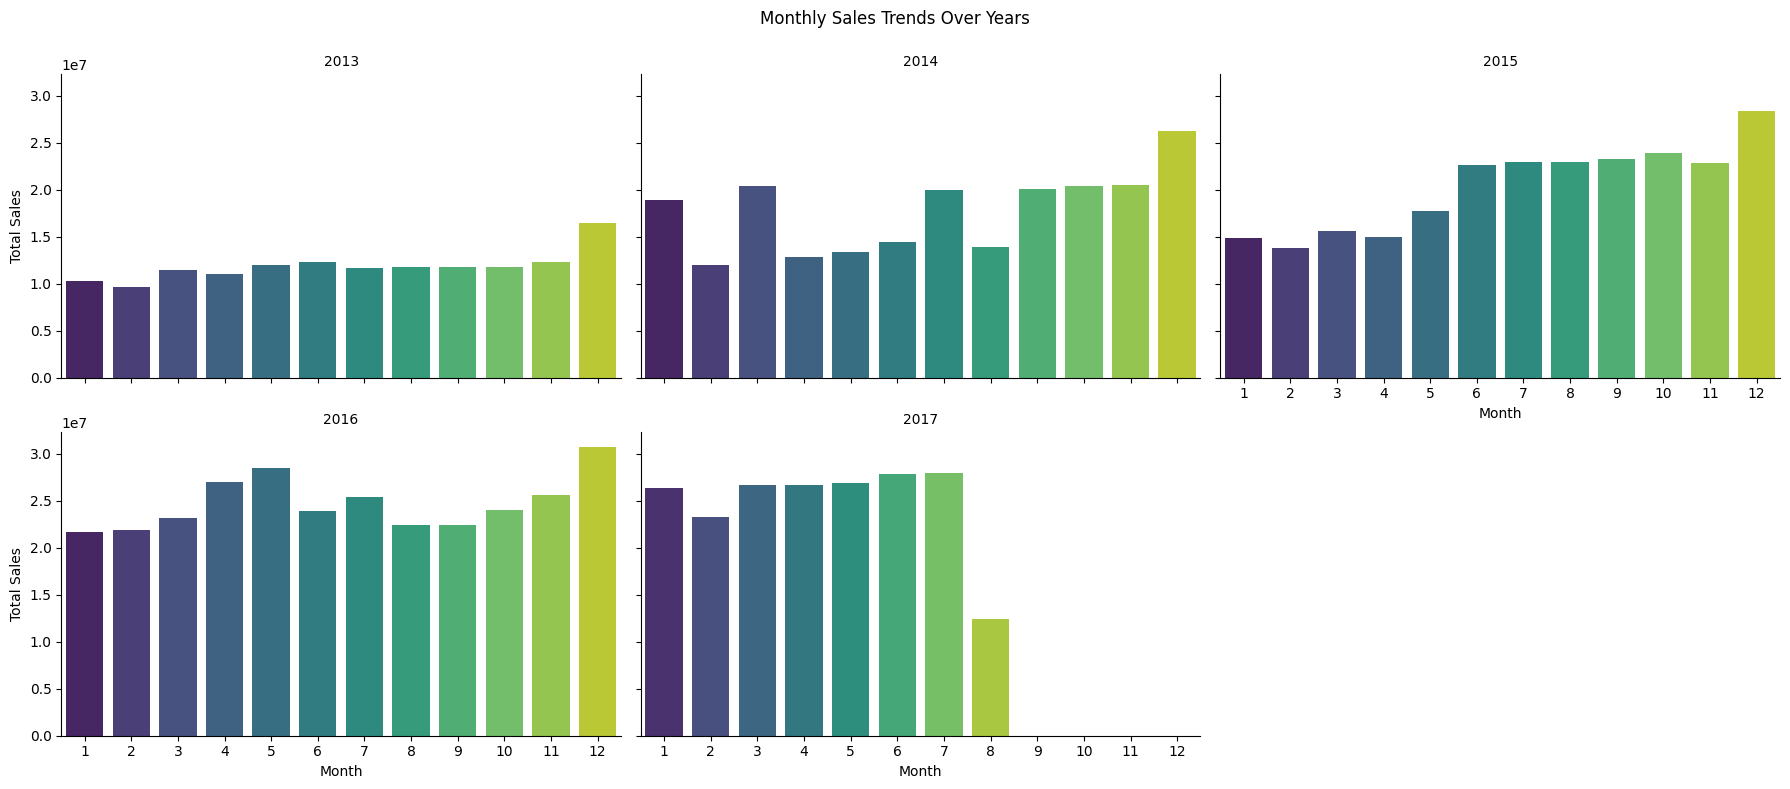

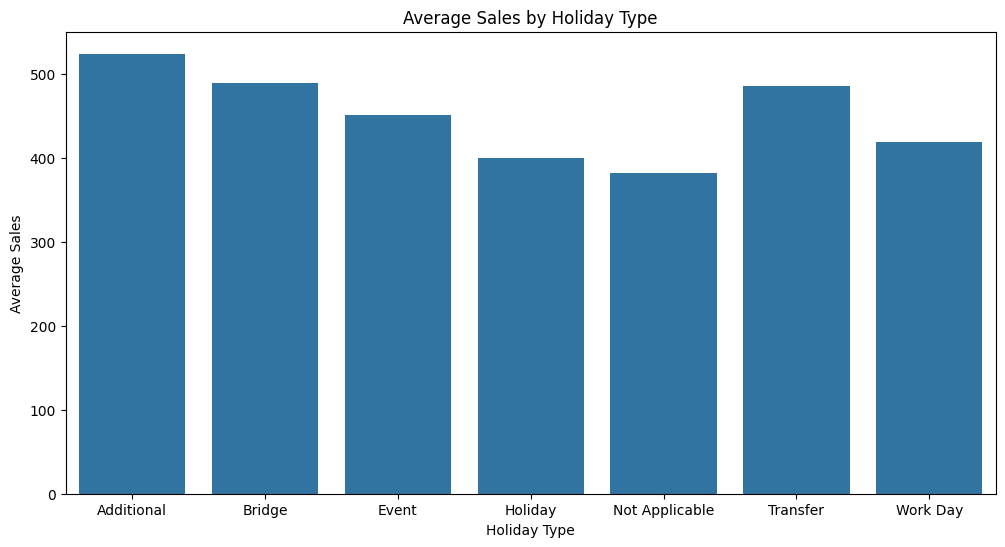

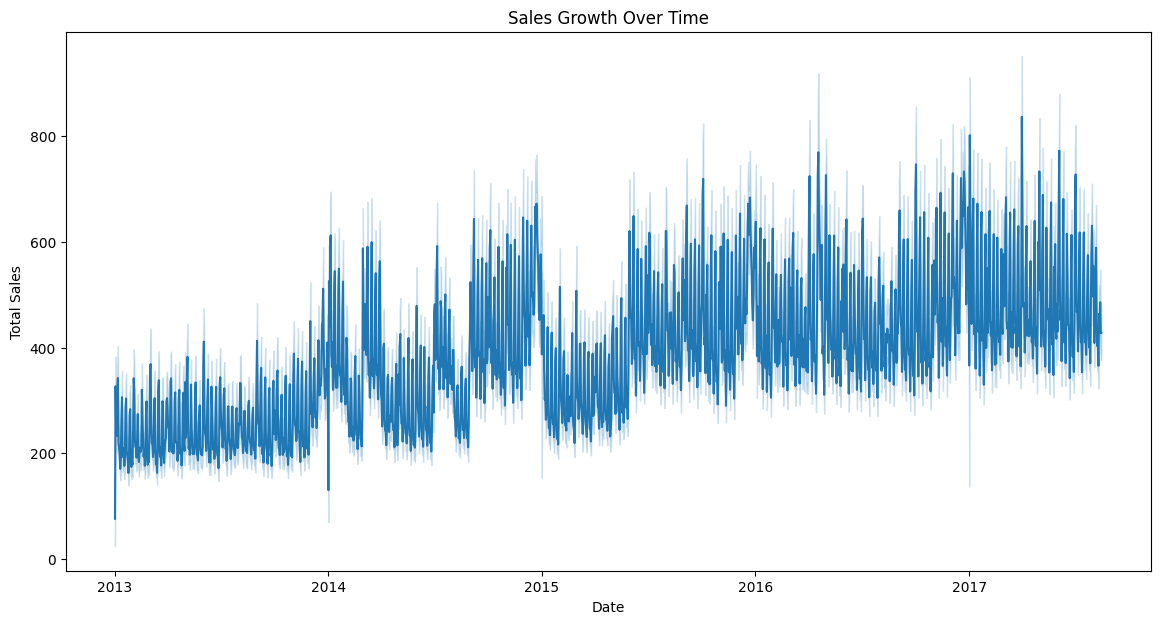

In [86]:

#  Seasonal Trends
# Group by month to observe seasonal trends
seasonal_sales = df_train.groupby('month')['sales'].sum()

# Plotting seasonal sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=seasonal_sales.index, y=seasonal_sales.values)
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(False)
plt.show()


# Day of the Week Analysis
# Group by day of the week to observe trends
weekday_sales = df_train.groupby('day')['sales'].mean()

# Plotting sales by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.grid(False)
plt.show()

# Group by year and month and sum the sales
monthly_sales = df_train.groupby(['year', 'month'])['sales'].sum().reset_index()

# Plotting the bar plot with subplots for each year
g = sns.FacetGrid(monthly_sales, col="year", col_wrap=3, height=4, aspect=1.5)
g.map(sns.barplot, "month", "sales", palette="viridis")
g.set_axis_labels("Month", "Total Sales")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Sales Trends Over Years')
plt.show()


# Holiday Impact
# Group by holiday type to observe sales impact
holiday_sales = df_train.groupby('holiday_type')['sales'].mean()

# Plotting sales by holiday type
plt.figure(figsize=(12, 6))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title('Average Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.grid(False)
plt.show()

# Sales Growth Over Time
# Plotting sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='sales', data=df_train)
plt.title('Sales Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(False)
plt.show()


- By extracting features such as month, day of the week, and year from the date, and analyzing these features, we can gain insights into seasonal sales patterns, the impact of specific days and holidays on sales, long-term sales trends, and overall sales growth. These analyses can help in making data-driven decisions for inventory management, promotional strategies, and resource allocation.
** **

### <a id='toc1_15_8_'></a>[Which product family and stores did the promotions affect.](#toc0_)

In [87]:

# Calculate Average Sales During Promotions:
df_promo = df_train[df_train['onpromotion'] > 0]
avg_sales_promo = df_promo.groupby(['family', 'store_nbr'])['sales'].mean().reset_index()
avg_sales_promo.rename(columns={'sales': 'avg_sales_promo'}, inplace=True)
avg_sales_promo

,family,store_nbr,avg_sales_promo
0,AUTOMOTIVE,1,4.714286
1,AUTOMOTIVE,2,7.076923
2,AUTOMOTIVE,3,13.000000
3,AUTOMOTIVE,4,5.800000
4,AUTOMOTIVE,5,7.105263
...,...,...,...
1777,SEAFOOD,50,22.663179
1778,SEAFOOD,51,68.551285
1779,SEAFOOD,52,13.627639
1780,SEAFOOD,53,7.875177


In [88]:

# Calculate Average Sales Without Promotions:
df_no_promo = df_train[df_train['onpromotion'] == 0]
avg_sales_no_promo = df_no_promo.groupby(['family', 'store_nbr'])['sales'].mean().reset_index()
avg_sales_no_promo.rename(columns={'sales': 'avg_sales_no_promo'}, inplace=True)

# Merge Data:
avg_sales = pd.merge(avg_sales_promo, avg_sales_no_promo, on=['family', 'store_nbr'], how='outer')
avg_sales['sales_difference'] = avg_sales['avg_sales_promo'] - avg_sales['avg_sales_no_promo']

# Identify the Most Affected Families and Stores:
affected = avg_sales.sort_values(by='sales_difference', ascending=False)
affected

,family,store_nbr,avg_sales_promo,avg_sales_no_promo,sales_difference
1663,PRODUCE,44,10302.969727,4147.239258,6155.730469
1668,PRODUCE,49,8145.202148,2871.406738,5273.795410
1622,PRODUCE,3,8307.570312,3308.976562,4998.593750
206,BEVERAGES,45,8392.028320,3975.962891,4416.065430
205,BEVERAGES,44,9606.489258,5192.213379,4414.275879
...,...,...,...,...,...
1286,MAGAZINES,45,NaN,8.827182,NaN
1290,MAGAZINES,49,NaN,8.547159,NaN
1292,MAGAZINES,51,NaN,5.885179,NaN
1293,MAGAZINES,52,NaN,10.487603,NaN


- Effectiveness of Promotions: Promotions can significantly boost sales, but the impact varies across different product families and stores. Tailoring promotional strategies to specific product categories and store characteristics can enhance effectiveness.
- Oil Prices: Oil prices have an indirect effect on sales through transportation costs, affecting product categories differently.
- Holidays: Holidays influence sales patterns, with certain product families experiencing notable increases in sales during these periods.
** **

### <a id='toc1_15_9_'></a>[What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)](#toc0_)
- **MSE:** Penalizes larger errors due to squaring. Sensitive to outliers.
- **RMSE:** Square root of MSE, providing an error metric in the same units as the target.
- **RMSLE:** Useful for targets spanning multiple orders of magnitude, less sensitive to large errors due to logarithmic scaling.
- **MAE:** Linear error metric, less sensitive to outliers compared to MSE and RMSE.

### <a id='toc1_15_10_'></a>[Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.](#toc0_)

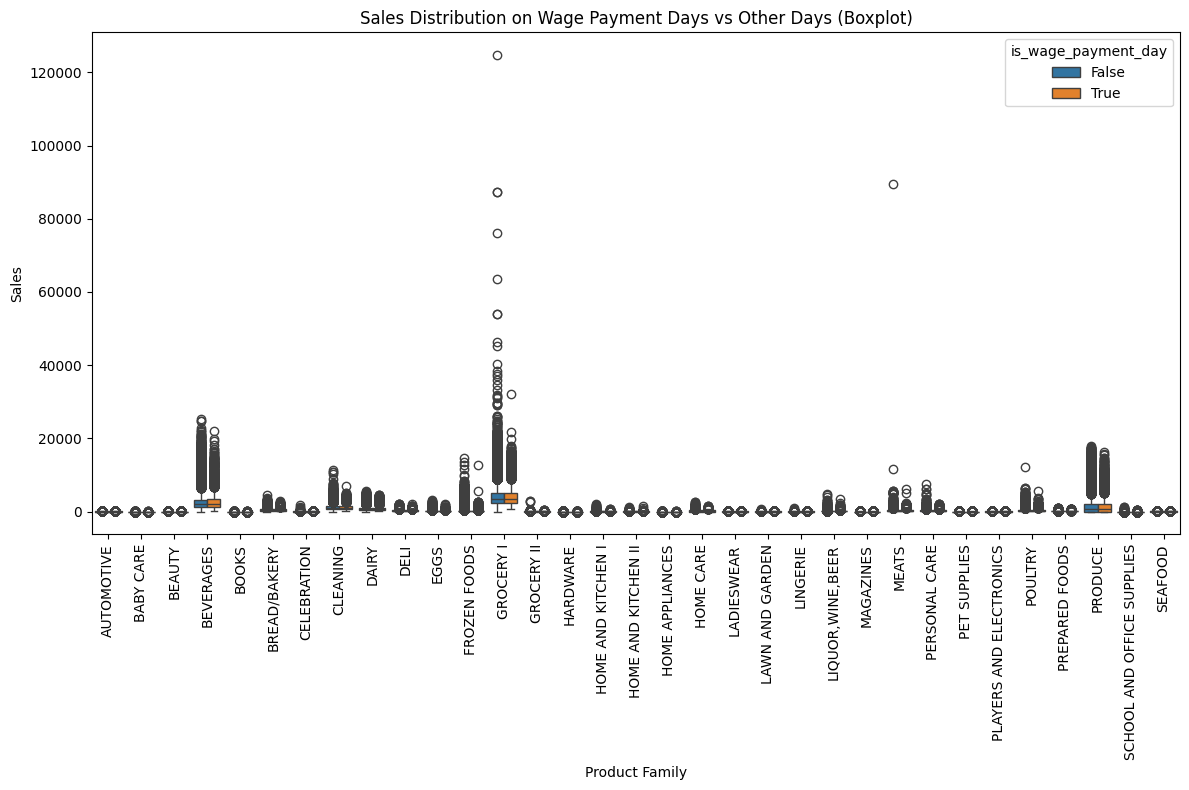

T-statistic: 1.0989649781051591
P-value: 0.27178343648842124


In [95]:

# Reset index to access the date column
df = df_train.reset_index()

# Convert the 'date' index to a datetime object if not already
df['date'] = pd.to_datetime(df['date'])

# Identify wage payment days
df['is_wage_payment_day'] = df['date'].apply(lambda x: x.day in [15, x.days_in_month])

# Calculate average sales on wage payment days and other days
avg_sales_wage_payment = df[df['is_wage_payment_day']].groupby(['family', 'store_nbr'])['sales'].mean().reset_index()
avg_sales_wage_payment.rename(columns={'sales': 'avg_sales_wage_payment'}, inplace=True)

avg_sales_non_wage_payment = df[~df['is_wage_payment_day']].groupby(['family', 'store_nbr'])['sales'].mean().reset_index()
avg_sales_non_wage_payment.rename(columns={'sales': 'avg_sales_non_wage_payment'}, inplace=True)

# Merge Data
avg_sales = pd.merge(avg_sales_wage_payment, avg_sales_non_wage_payment, on=['family', 'store_nbr'], how='outer')
avg_sales['sales_difference'] = avg_sales['avg_sales_wage_payment'] - avg_sales['avg_sales_non_wage_payment']

# Identify the most affected families and stores
affected = avg_sales.sort_values(by='sales_difference', ascending=False)

# Plotting with boxplot instead of violin plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='family', y='sales', hue='is_wage_payment_day', data=df)
plt.xticks(rotation=90)
plt.title('Sales Distribution on Wage Payment Days vs Other Days (Boxplot)')
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Perform a t-test to compare sales on payment and non-payment days
payment_days_sales = df[df['is_wage_payment_day']]['sales']
non_payment_days_sales = df[~df['is_wage_payment_day']]['sales']

t_stat, p_value = stats.ttest_ind(payment_days_sales, non_payment_days_sales)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


## <a id='toc1_16_'></a>[Machine Learning Processes And Models](#toc0_)

` Pipeline for processing `

#### <a id='toc1_16_1_1_'></a>[Pipeline Creation](#toc0_)

In [96]:
# Combined preprocessing function
def combined_preprocessing(df, date_column='date', impute_column='dcoilwtico', impute_strategy='mean', columns_to_standardize=None):
    # Convert date column to datetime
    df[date_column] = pd.to_datetime(df[date_column])

    # Add date parts
    df['day'] = df[date_column].dt.day_name()
    df['month'] = df[date_column].dt.month
    df['week'] = df[date_column].dt.isocalendar().week.astype(int)
    df['year'] = df[date_column].dt.year

    # Analyze missing values and duplicates
    print("Proportion of missing values:")
    print((df.isnull().mean() * 100).round(2))
    print("\nNumber of duplicated rows:", df.duplicated().sum())

    # Impute missing values
    if impute_column in df.columns:
        imputer = SimpleImputer(strategy=impute_strategy)
        df[impute_column] = imputer.fit_transform(df[[impute_column]])
    else:
        print(f"Column '{impute_column}' not found in DataFrame. Skipping imputation step.")

    # Standardize certain columns
    if columns_to_standardize is not None:
        for column in columns_to_standardize:
            if column in df.columns:
                df[column] = df[column].apply(lambda x: 'Yes' if x is True else ('No' if x is False else ('Not Applicable' if pd.isna(x) else x)))
            else:
                print(f"Column '{column}' not found in DataFrame. Skipping standardization step for this column.")
    
    # Print value counts for standardized columns
    if columns_to_standardize is not None:
        for column in columns_to_standardize:
            if column in df.columns:
                print(df[column].value_counts())
                print()

    # Convert numeric columns to optimize memory usage
    float64_cols = df.select_dtypes(include=['float64'])
    df[float64_cols.columns] = float64_cols.astype('float32')
    float_cols = df.select_dtypes(include=['float'])
    df[float_cols.columns] = df[float_cols.columns].apply(pd.to_numeric, downcast='float')
    int_cols = df.select_dtypes(include=['int'])
    df[int_cols.columns] = df[int_cols.columns].apply(pd.to_numeric, downcast='integer')

    return df


In [99]:

# Load the data
test_1 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\The_Regression_Project\Project_data\test.csv")
test_2 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\The_Regression_Project\Project_data\sample_submission_test.csv")
df_test = pd.merge(test_1, test_2, on='id', how='left')


In [100]:

# Apply preprocessing pipeline to the test data
columns_to_standardize = ['holiday_type', 'locale', 'locale_name', 'description', 'transferred']
preprocessing_pipeline = Pipeline(steps=[
    ('combined_preprocessing', FunctionTransformer(combined_preprocessing, 
                                                   kw_args={
                                                       'date_column': 'date', 
                                                       'impute_column': 'dcoilwtico', 
                                                       'columns_to_standardize': columns_to_standardize
                                                   }))
])
df_test_processed = preprocessing_pipeline.fit_transform(df_test)
print(df_test_processed)

Proportion of missing values:
id             0.0
date           0.0
store_nbr      0.0
family         0.0
onpromotion    0.0
sales          0.0
day            0.0
month          0.0
week           0.0
year           0.0
dtype: float64

Number of duplicated rows: 0
Column 'dcoilwtico' not found in DataFrame. Skipping imputation step.
Column 'holiday_type' not found in DataFrame. Skipping standardization step for this column.
Column 'locale' not found in DataFrame. Skipping standardization step for this column.
Column 'locale_name' not found in DataFrame. Skipping standardization step for this column.
Column 'description' not found in DataFrame. Skipping standardization step for this column.
Column 'transferred' not found in DataFrame. Skipping standardization step for this column.
            id       date  store_nbr                      family  onpromotion  \
0      3000888 2017-08-16          1                  AUTOMOTIVE            0   
1      3000889 2017-08-16          1           

#### <a id='toc1_16_1_2_'></a>[Data Spliting](#toc0_)

In [101]:
# Define the sampling function
def sample_data(df: pd.DataFrame, size: float):
    """
    Randomly samples data from the entire training dataset.

    Parameters: 
    df: pd.DataFrame, the input dataframe to be sampled from
    size: float, the proportion of the number of rows to sample

    Returns:
    pd.DataFrame, the sampled dataframe
    """
    # Calculate the number of rows to sample
    sample_size = int(size * len(df))
    # Randomly sample the data
    sampled_data = df.sample(n=sample_size, random_state=42)
    return sampled_data

# Apply the sample_data function to randomly sample 40% of the data
samp_df_model = sample_data(df_train, 0.4)

# Reset the index
samp_df_model = samp_df_model.reset_index(drop=True)


In [103]:
# Align columns in train and test data
def align_columns(df_train, df_test):
    # Get columns in df_train that are not in df_test
    missing_cols = set(df_train.columns) - set(df_test.columns)
    
    # Add missing columns to df_test and fill them with zeros
    for col in missing_cols:
        df_test[col] = 0
    
    # Ensure columns in df_test are in the same order as df_train
    df_test = df_test[df_train.columns]
    
    return df_test

In [106]:
# List of categorical columns to be encoded
categorical_columns = ['family', 'city', 'day', 'state', 'store_type', 'holiday_type', 'locale', 'locale_name', 'description', 'transferred']

# Function to create a mapping dictionary for each categorical column
def create_mapping(df_train, df_test, column):
    unique_values = pd.concat([df_train[column], df_test[column]]).unique()
    return {value: idx for idx, value in enumerate(unique_values)}

# Create a dictionary to hold mappings for all categorical columns
mappings = {col: create_mapping(df_train, df_test_processed, col) for col in categorical_columns}

# Apply the mappings to both df_train and df_test
for col in categorical_columns:
    df_train[col] = df_train[col].map(mappings[col])
    df_test_processed[col] = df_test_processed[col].map(mappings[col])

# Scale numerical columns
numerical_columns = df_train.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('sales')

scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test_processed[numerical_columns] = scaler.transform(df_test_processed[numerical_columns])

# Encode categorical features using OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
df_train_encoded = encoder.fit_transform(df_train[categorical_columns])
df_test_encoded = encoder.transform(df_test_processed[categorical_columns])

# Convert encoded features to DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
df_train_encoded = pd.DataFrame(df_train_encoded.toarray(), columns=encoded_feature_names, index=df_train.index)
df_test_encoded = pd.DataFrame(df_test_encoded.toarray(), columns=encoded_feature_names, index=df_test_processed.index)

# Combine numerical and encoded categorical features
Xdf_train_copy1 = pd.concat([df_train[numerical_columns], df_train_encoded], axis=1)
Xdf_test_copy1 = pd.concat([df_test_processed[numerical_columns], df_test_encoded], axis=1)

In [107]:
# Sample 40% of the data for training
df_train_subset = sample_data(df_train, 0.4)

# Preprocess the training subset
df_train_subset = preprocessing_pipeline.fit_transform(df_train_subset)

# Split the data into training and validation sets
train_ml, val_ml = train_test_split(df_train_subset, test_size=0.2, shuffle=True)
X_train = train_ml.drop(columns=['sales'])
y_train = train_ml['sales']
X_val = val_ml.drop(columns=['sales'])
y_val = val_ml['sales']

# Align columns in train and test data
df_test_processed = align_columns(df_train_subset, df_test_processed)


Proportion of missing values:
id              0.0
date            0.0
store_nbr       0.0
family          0.0
sales           0.0
onpromotion     0.0
day             0.0
month           0.0
week            0.0
year            0.0
city            0.0
state           0.0
store_type      0.0
cluster         0.0
transactions    0.0
dcoilwtico      0.0
holiday_type    0.0
locale          0.0
locale_name     0.0
description     0.0
transferred     0.0
dtype: float64

Number of duplicated rows: 0
holiday_type
1    938653
0    109268
4     37857
3     25119
5      6151
2      3138
6      1906
Name: count, dtype: int64

locale
1    938653
0     94403
2     77147
3     11889
Name: count, dtype: int64

locale_name
1     938653
0      94403
15      7376
6       6524
8       5960
11      5926
22      5354
17      5221
4       3987
9       3362
10      3353
14      3349
12      3308
13      3275
16      3269
2       3254
3       3239
5       3235
7       3148
19      2693
21      2673
18      2651
2

In [109]:
# Example: Convert date column to day, month, year, etc.
X_train['day'] = X_train['date'].dt.day
X_train['month'] = X_train['date'].dt.month
X_train['year'] = X_train['date'].dt.year

# After converting, you can drop the original 'date' column
X_train = X_train.drop(columns=['date'])

# Repeat for validation and test sets as needed


In [110]:

# Define and train models one at a time

# 1. Train RandomForest
print("Training RandomForest...")
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Perform hyperparameter tuning for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=6, scoring='neg_mean_squared_error', cv=5, verbose=2, random_state=42)
rf_random_search.fit(X_train, y_train)
print(f"Best parameters for RandomForest: {rf_random_search.best_params_}")
print(f"Best score for RandomForest: {rf_random_search.best_score_}")


Training RandomForest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=53.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 8.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.6min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=17.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=17.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=16.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=16.8mi

In [112]:

# 2. Train XGBoost
print("Training XGBoost...")
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

# Perform hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [2, 4, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_iter=6, scoring='neg_mean_squared_error', cv=5, verbose=2, random_state=42)
xgb_random_search.fit(X_train, y_train)
print(f"Best parameters for XGBoost: {xgb_random_search.best_params_}")
print(f"Best score for XGBoost: {xgb_random_search.best_score_}")


Training XGBoost...


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:family: category, city: category, state: category, store_type: category, holiday_type: category, locale: category, locale_name: category, description: category, transferred: category

In [ ]:

# 3. Train ARIMA with pmdarima's auto_arima
print("Training ARIMA...")
auto_arima_model = pm.auto_arima(y_train, start_p=1, start_q=1, max_p=7, max_q=7, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(f"Best ARIMA order: {auto_arima_model.order}")


In [ ]:

# 4. Train ETS
print("Training ETS...")
best_mse = float('inf')
best_params = None
for trend, seasonal, period in itertools.product(trend_options, seasonal_options, seasonal_periods):
    ets_model = ExponentialSmoothing(y_train, trend=trend, seasonal=seasonal, seasonal_periods=period).fit()
    val_predictions = ets_model.forecast(len(X_val))
    mse = mean_squared_error(y_val, val_predictions)
    if mse < best_mse:
        best_mse = mse
        best_params = (trend, seasonal, period)
print(f"Best ETS parameters: Trend: {best_params[0]}, Seasonal: {best_params[1]}, Seasonal Periods: {best_params[2]}")
